# EDA

In [1]:
!nvidia-smi

Thu Mar 23 09:27:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:06:00.0 Off |                    0 |
| N/A   30C    P0    42W / 163W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup Environment

In [2]:
import matplotlib
%matplotlib inline

# sync python module
%load_ext autoreload
%autoreload 2

## Import Library

In [18]:
workspace_dir = '/nfs/Workspace/TeethSeg'
import sys
sys.path.append(workspace_dir)
import os

from monai.data import CacheDataset, DatasetSummary, DataLoader
from monai.transforms import (
    AddChanneld,
    Compose,
    LoadImaged,
    Orientationd,
    ScaleIntensityRanged,
    ScaleIntensityRangePercentilesd,
    NormalizeIntensityd,
    Spacingd,
    ToTensord,
    SqueezeDimd,
    LabelToMaskd
)
from monai.utils import first

import matplotlib.pyplot as plt
import pandas as pd

from data_utils.teeth_dataset import get_data_dicts
from data_utils.data_loader_utils import load_data_dict_json
from data_utils.visualization import show_img_lbl
from data_utils.utils import get_data_info

## Prepare data dicts

In [4]:
data_dir = '/nfs/Workspace/dataset/teeth/cindydata'
data_json = os.path.join(data_dir, 'data.json')

In [5]:
# data_dicts = get_data_dicts(data_dir)
tr_ds, val_ds, tt_ds = load_data_dict_json(data_dir, data_json)

load json from /nfs/Workspace/dataset/teeth/cindydata/data.json
train files (11): ['1001152328_20150714', '1001162439_20140520', '1001162439_20150708', '1001172283_20190622', '1001213121_20180115', '1001218388_20161024', '1001223657_20180112', '1001263197_20180115', '1001275319_20180114', '1001277267_20180112', '1001377656_20171105']
val files (10): ['1001377656_20180116', '1001381644_20180112', '1001382496_20180112', '1001382496_20180423', '1001382496_20201206', '1001384881_20180110', '1001398270_20180111', '1001470164_20180114', '1001484858_20150118', '1001484858_20180109']
test files (5): ['1001486953_20180109', '1001487462_20170505', '1001487462_20180109', '1001487462_20180527', '1001487462_20190427']


## Show data info

pid: 1001152328_20150714
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001152328_20150714.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22.]


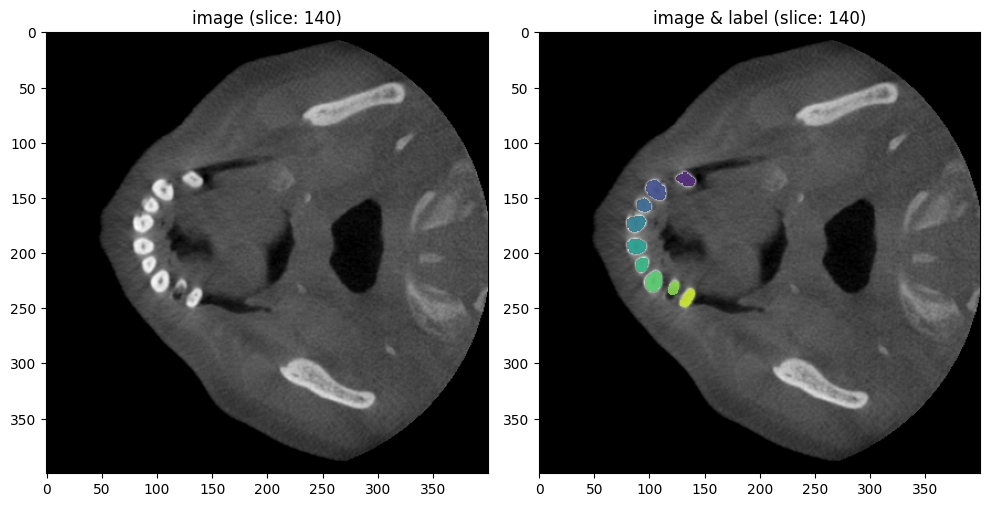

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001162439_20140520
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20140520.nii.gz
img shape: [400, 400, 328]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 328]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


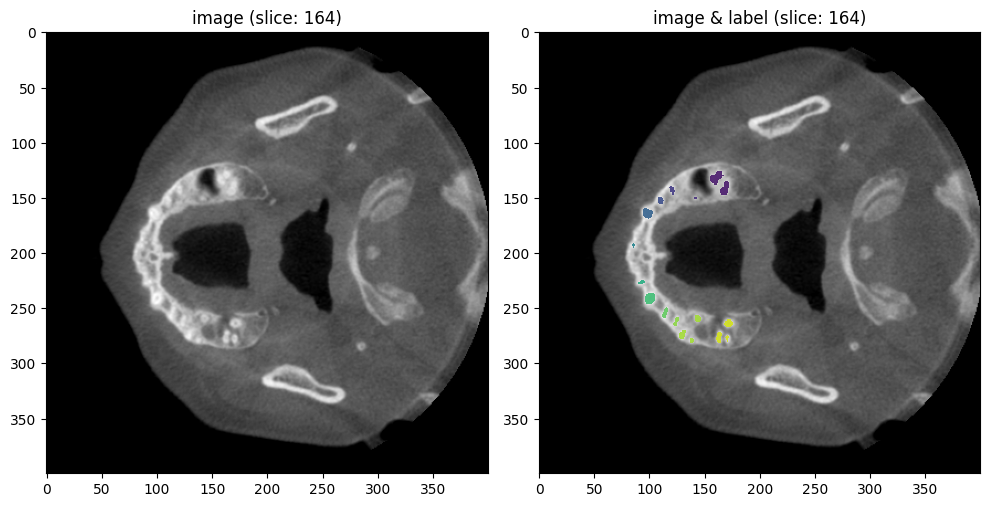

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001162439_20150708
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20150708.nii.gz
img shape: [400, 400, 272]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 272]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]


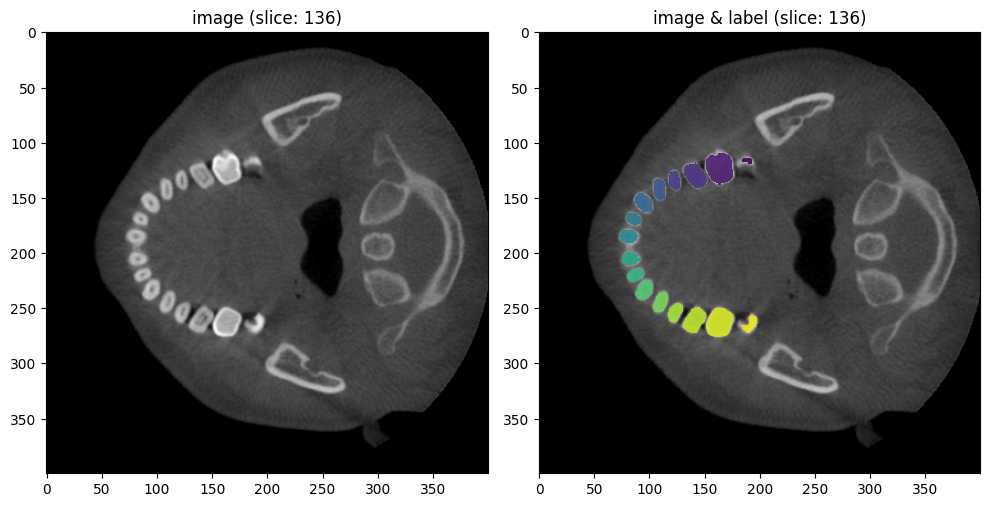

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001172283_20190622
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001172283_20190622.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]


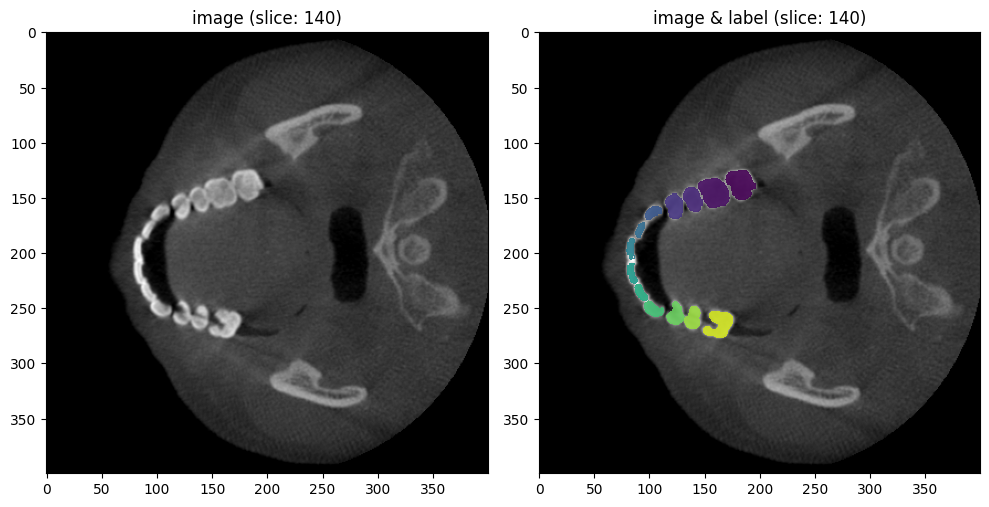

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001213121_20180115
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001213121_20180115.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


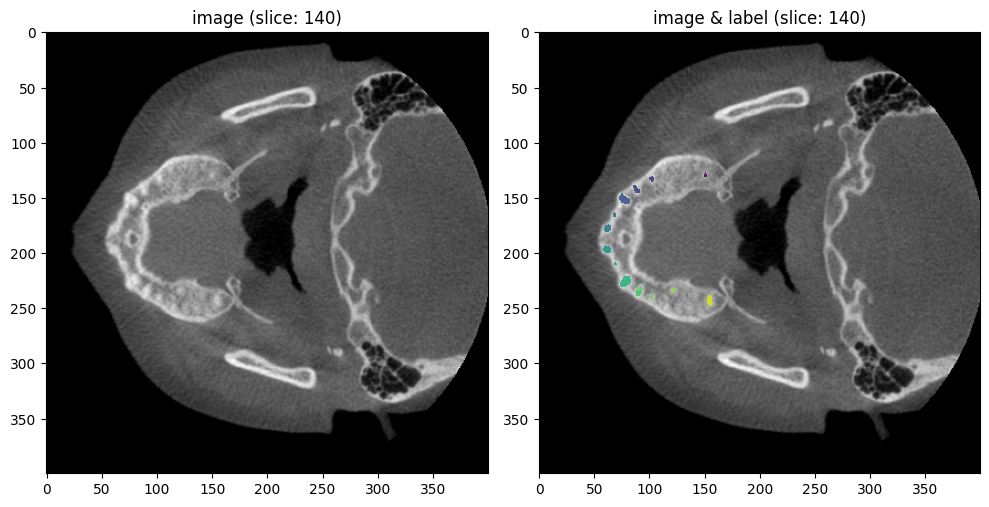

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001218388_20161024
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001218388_20161024.nii.gz
img shape: [400, 400, 264]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 264]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


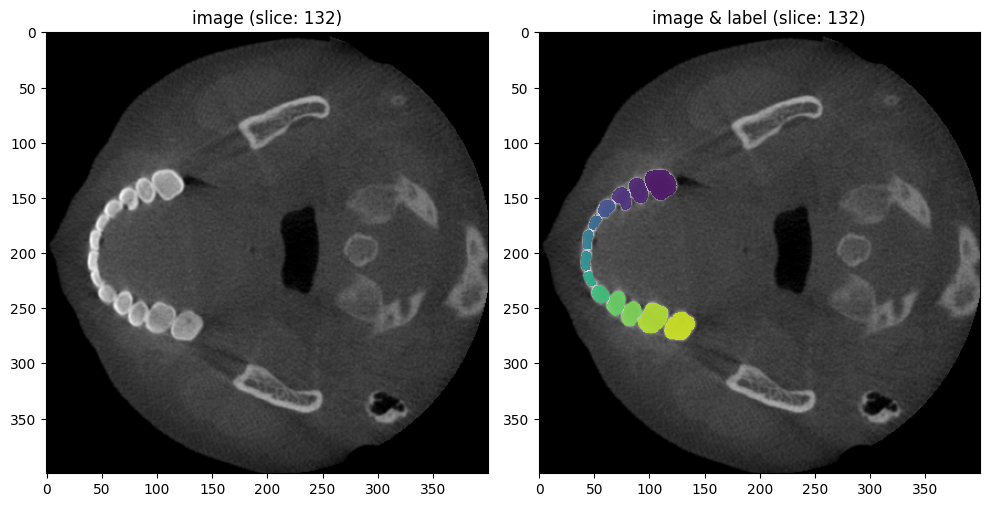

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001223657_20180112
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001223657_20180112.nii.gz
img shape: [400, 400, 256]
img spacing: [0.4, 0.4, 0.39999998]
lbl shape: [400, 400, 256]
lbl spacing: [0.4, 0.4, 0.39999998]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


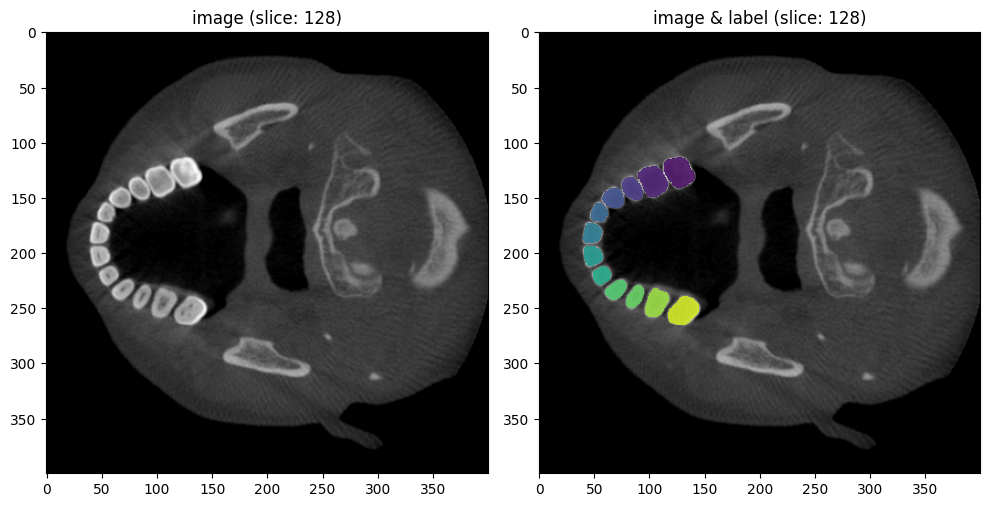

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001263197_20180115
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001263197_20180115.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]


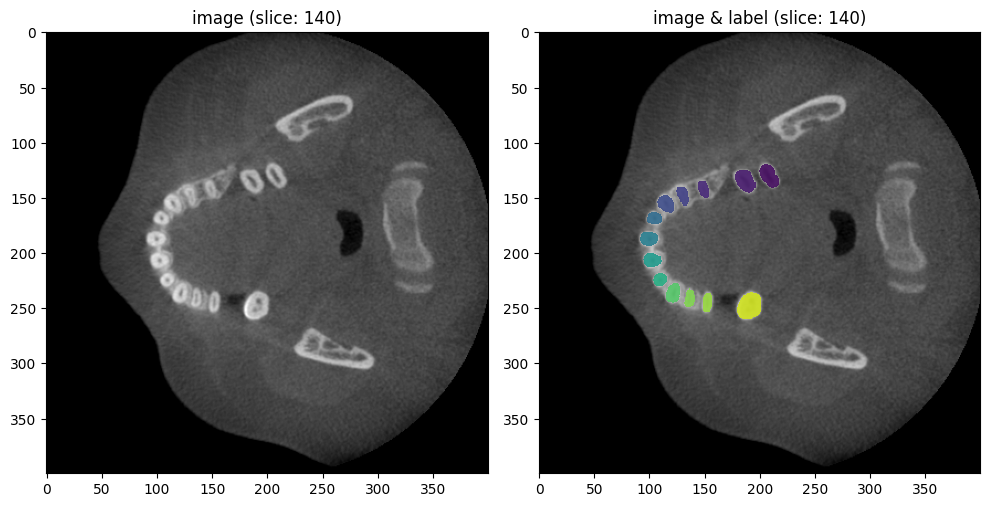

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001275319_20180114
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001275319_20180114.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]


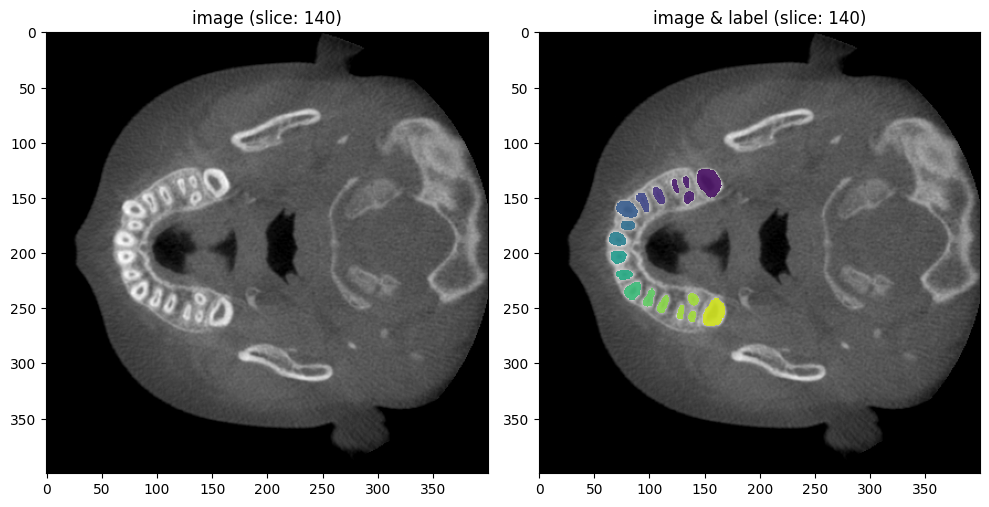

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001277267_20180112
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001277267_20180112.nii.gz
img shape: [400, 400, 264]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 264]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  5.  6.  7.  9. 10. 11. 12. 14. 15. 16. 17. 18. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


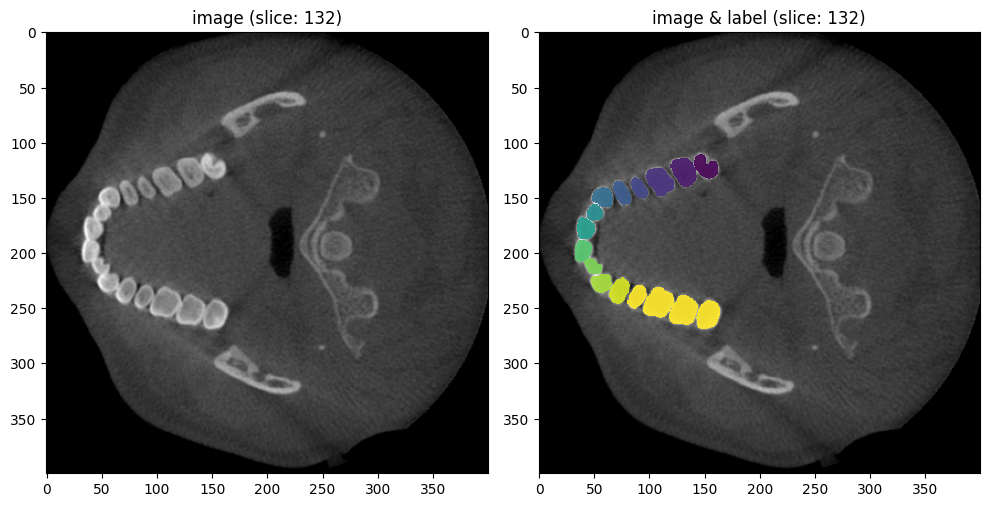

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001377656_20171105
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001377656_20171105.nii.gz
img shape: [400, 400, 248]
img spacing: [0.4, 0.4, 0.39999998]
lbl shape: [400, 400, 248]
lbl spacing: [0.4, 0.4, 0.39999998]
lbl ids: [ 0.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 19. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


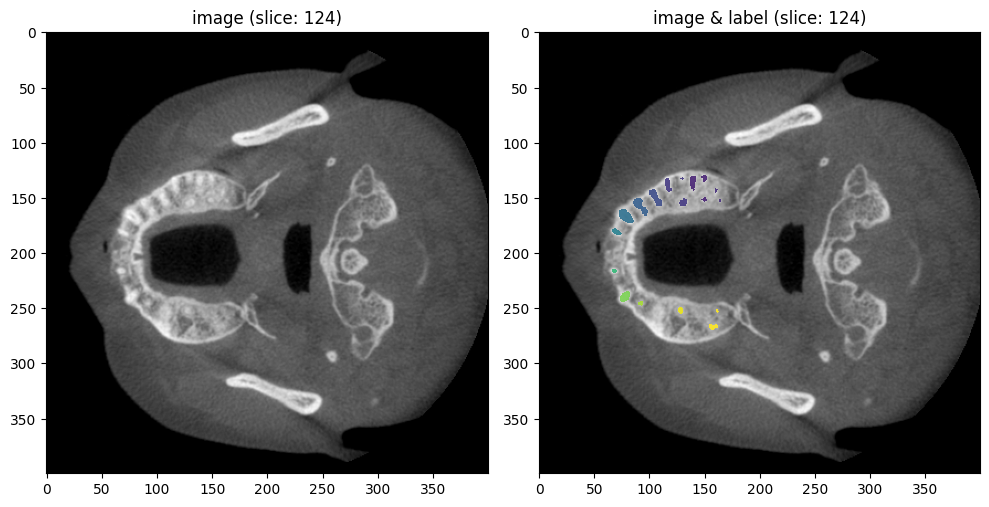

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [6]:
data_info_df = get_data_info(tr_ds)

In [ ]:
data_info_df

In [ ]:
print('avg shape')
data_shape_df = pd.DataFrame(data_info_df['img_shape'].to_list(), columns=['w', 'h', 's'])
data_shape_df.mean()

In [ ]:
print('avg space')
data_space_df = pd.DataFrame(data_info_df['img_space'].to_list(), columns=['x', 'y', 'z'])
data_space_df.mean()

## Statcics

In [9]:
tr_ds

[{'image': '/nfs/Workspace/dataset/teeth/cindydata/image/1001152328_20150714.nii.gz',
  'label': '/nfs/Workspace/dataset/teeth/cindydata/label/1001152328_20150714.nii.gz'},
 {'image': '/nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20140520.nii.gz',
  'label': '/nfs/Workspace/dataset/teeth/cindydata/label/1001162439_20140520.nii.gz'},
 {'image': '/nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20150708.nii.gz',
  'label': '/nfs/Workspace/dataset/teeth/cindydata/label/1001162439_20150708.nii.gz'},
 {'image': '/nfs/Workspace/dataset/teeth/cindydata/image/1001172283_20190622.nii.gz',
  'label': '/nfs/Workspace/dataset/teeth/cindydata/label/1001172283_20190622.nii.gz'},
 {'image': '/nfs/Workspace/dataset/teeth/cindydata/image/1001213121_20180115.nii.gz',
  'label': '/nfs/Workspace/dataset/teeth/cindydata/label/1001213121_20180115.nii.gz'},
 {'image': '/nfs/Workspace/dataset/teeth/cindydata/image/1001218388_20161024.nii.gz',
  'label': '/nfs/Workspace/dataset/teeth/cindydat

In [6]:
base_tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label'])
])
data = base_tf(tr_ds[:2])

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.


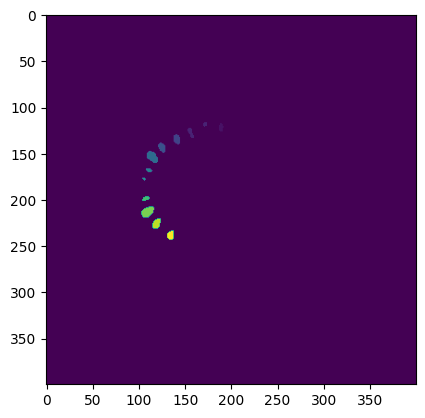

In [7]:
plt.imshow(data[0]['label'][0,:,:,80])

In [9]:
data_dicts = tr_ds[:1]

base_tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label'])
])

ds = CacheDataset(
    data=data_dicts,
    transform=base_tf,
    num_workers=0
)

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
Loading dataset: 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


In [10]:
# ref: https://arxiv.org/pdf/1904.08128.pdf
min_percentile = 0.5
max_percentile = 99.5
s = DatasetSummary(ds)
s.calculate_percentiles(min_percentile,max_percentile)
s.calculate_statistics()
data_target_space = s.get_target_spacing()

In [11]:
print('data target space:')
data_target_space

data target space:


(0.4000000059604645, 0.4000000059604645, 0.40000057220458984)

In [12]:
print('data intensities statcics:')
data_intensities_statcics = pd.DataFrame(
    [[s.data_min, s.data_median, s.data_max, s.data_mean, s.data_std, s.data_min_percentile, s.data_max_percentile]],
    columns=['min', 'med', 'max', 'mean', 'std', f'min_percentile ({min_percentile}%)', f'max_percentile ({max_percentile}%)']
)
data_intensities_statcics

data intensities statcics:


min     med     max         mean         std  min_percentile (0.5%)  \
0 -1000.0  1424.0  2874.0  1402.380981  383.660156               -618.985   

   max_percentile (99.5%)  
0                2498.855

## Transform

In [17]:
space = data_target_space
a_min = s.data_min_percentile
a_max = s.data_max_percentile
teeth_transform = Compose(
      [
          LoadImaged(keys=["image", "label"]),
          AddChanneld(keys=["image", "label"]),
          Orientationd(keys=["image", "label"], axcodes="RAS"),
          Spacingd(
              keys=["image", "label"],
              pixdim=space,
              mode=("bilinear", "nearest"),
          ),
          # ScaleIntensityRangePercentilesd(
          #     keys=["image"], lower=3, upper=97, b_min=0.0, b_max=1.0, clip=True
          # ),
          # ScaleIntensityRanged(
          #     keys=["image"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True
          # ),
          NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
          ToTensord(keys=["image", "label"]),
          SqueezeDimd(keys=["image", "label"]),
      ]
  )

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.


NameError: name 'NormalizeIntensityd' is not defined

pid: 1001152328_20150714
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001152328_20150714.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22.]


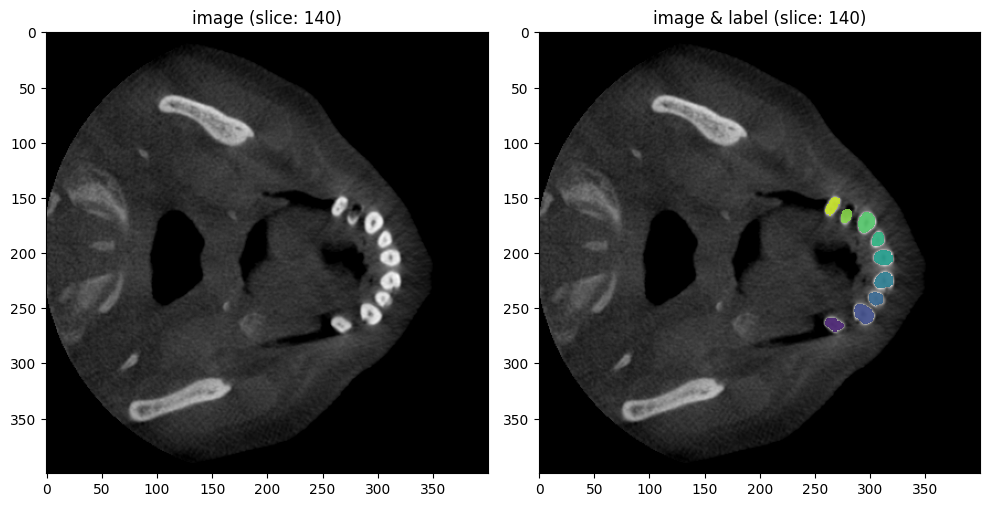

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001162439_20140520
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20140520.nii.gz
img shape: [400, 400, 328]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 328]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


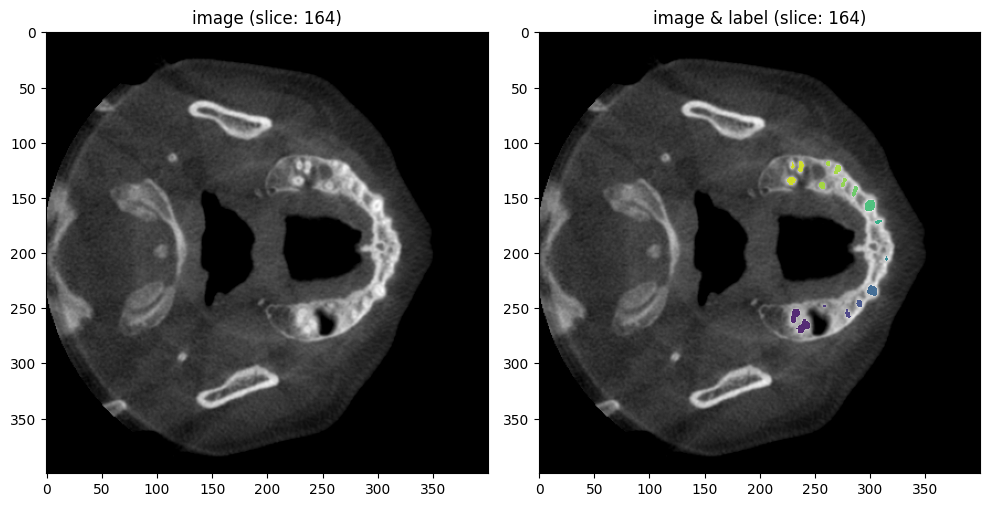

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001162439_20150708
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20150708.nii.gz
img shape: [400, 400, 272]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 272]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]


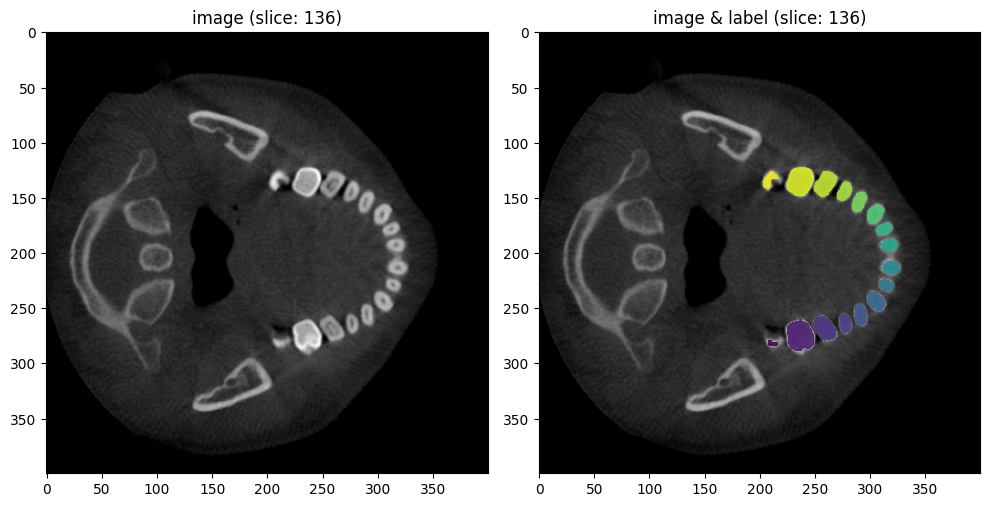

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001172283_20190622
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001172283_20190622.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]


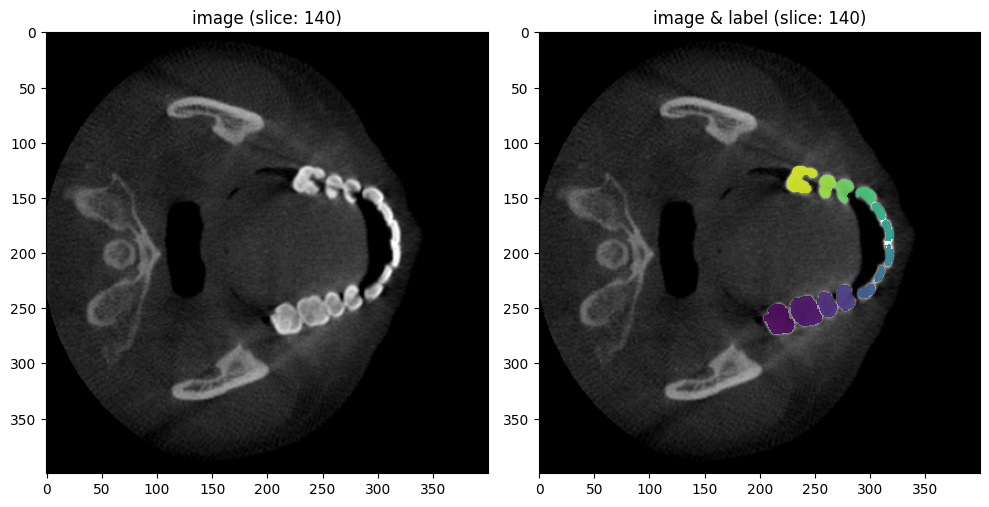

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001213121_20180115
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001213121_20180115.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


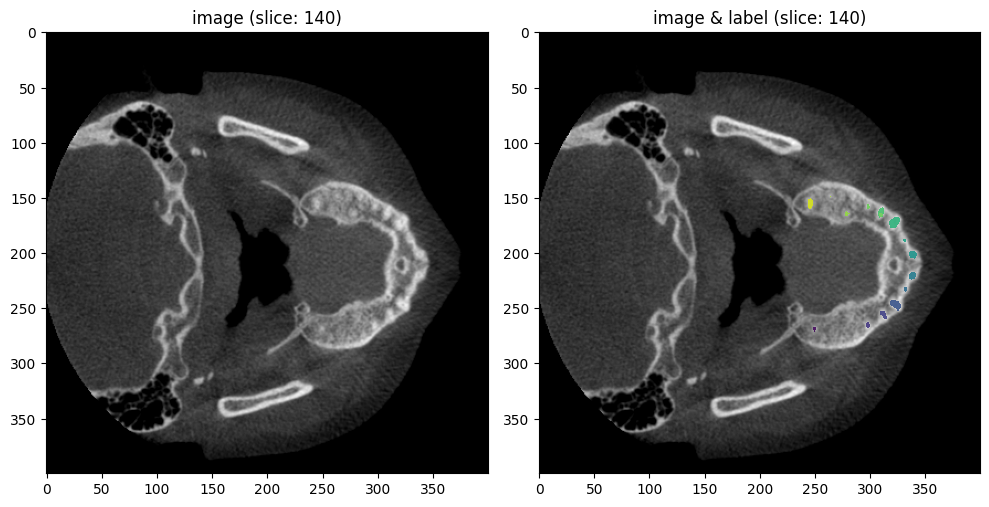

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001218388_20161024
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001218388_20161024.nii.gz
img shape: [400, 400, 264]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 264]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


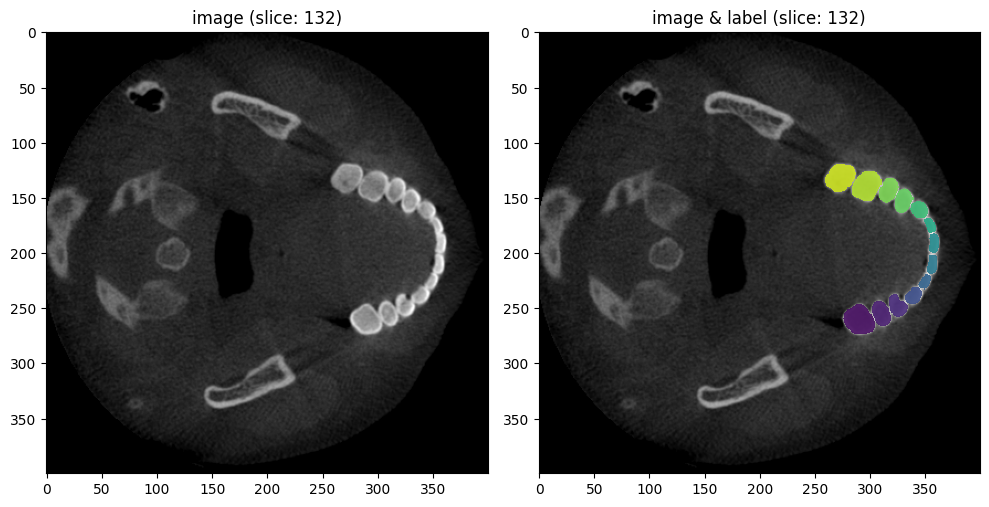

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001223657_20180112
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001223657_20180112.nii.gz
img shape: [400, 400, 256]
img spacing: [0.4, 0.4, 0.39999998]
lbl shape: [400, 400, 256]
lbl spacing: [0.4, 0.4, 0.39999998]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


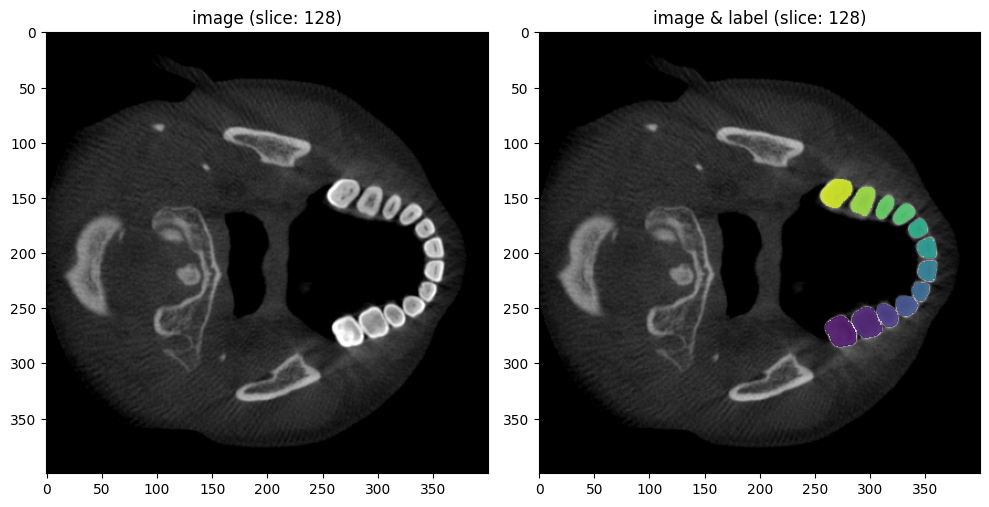

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001263197_20180115
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001263197_20180115.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]


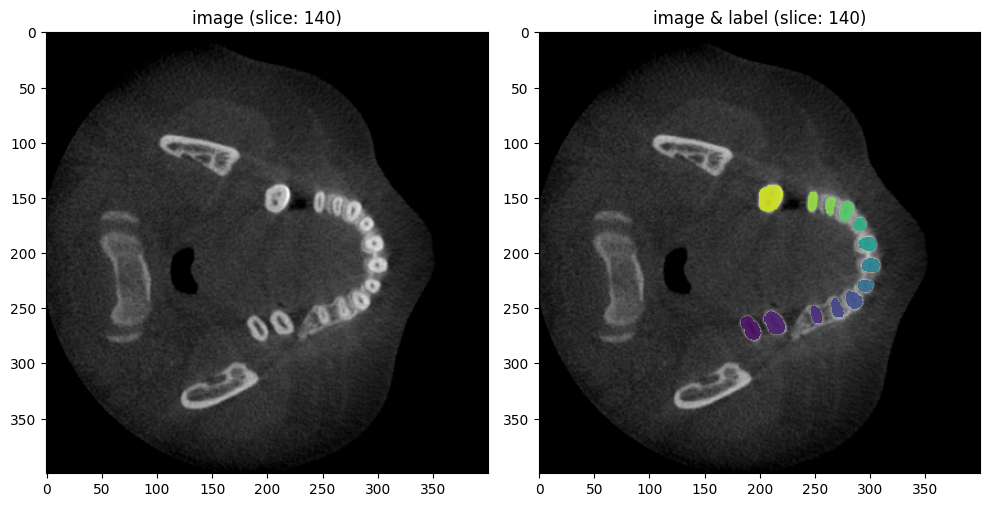

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001275319_20180114
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001275319_20180114.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]


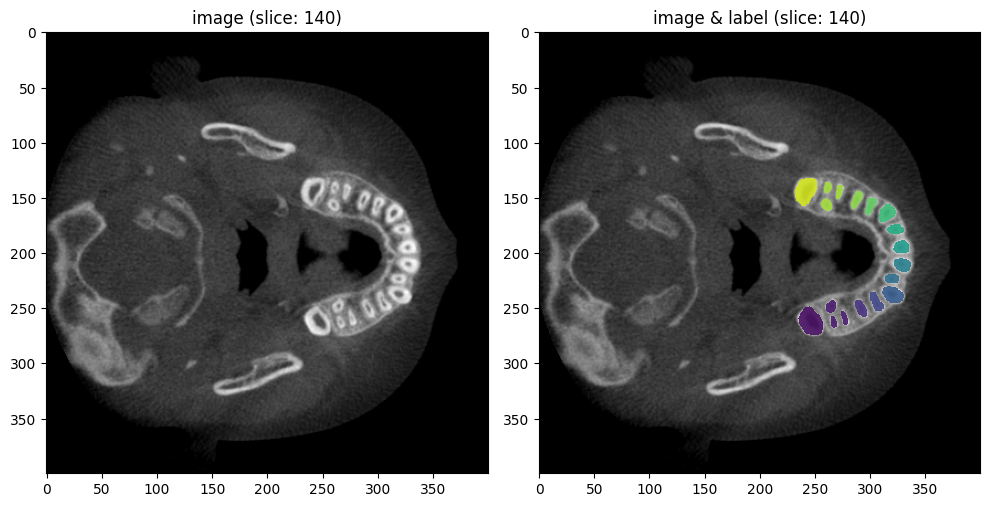

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001277267_20180112
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001277267_20180112.nii.gz
img shape: [400, 400, 264]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 264]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [ 0.  1.  2.  3.  5.  6.  7.  9. 10. 11. 12. 14. 15. 16. 17. 18. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


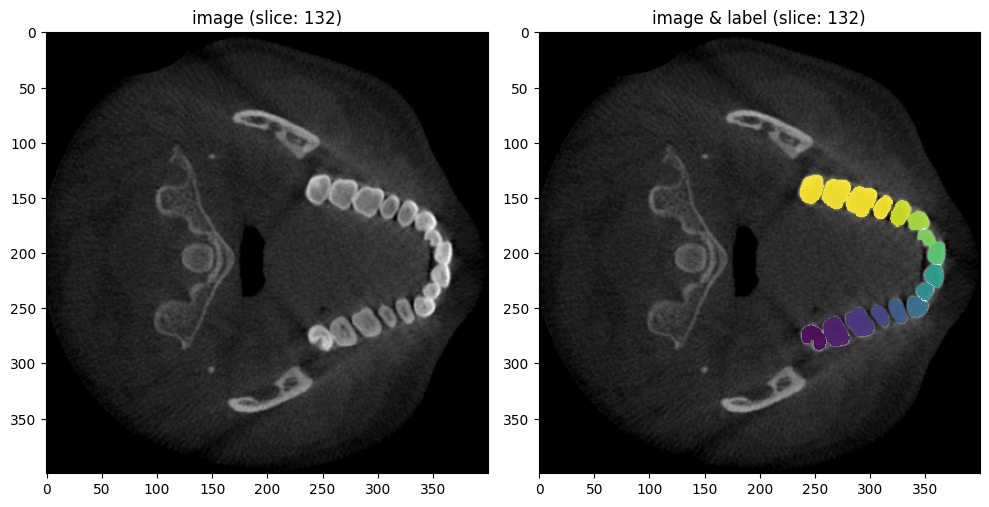

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001377656_20171105
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001377656_20171105.nii.gz
img shape: [400, 400, 248]
img spacing: [0.4, 0.4, 0.39999998]
lbl shape: [400, 400, 248]
lbl spacing: [0.4, 0.4, 0.39999998]
lbl ids: [ 0.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 19. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


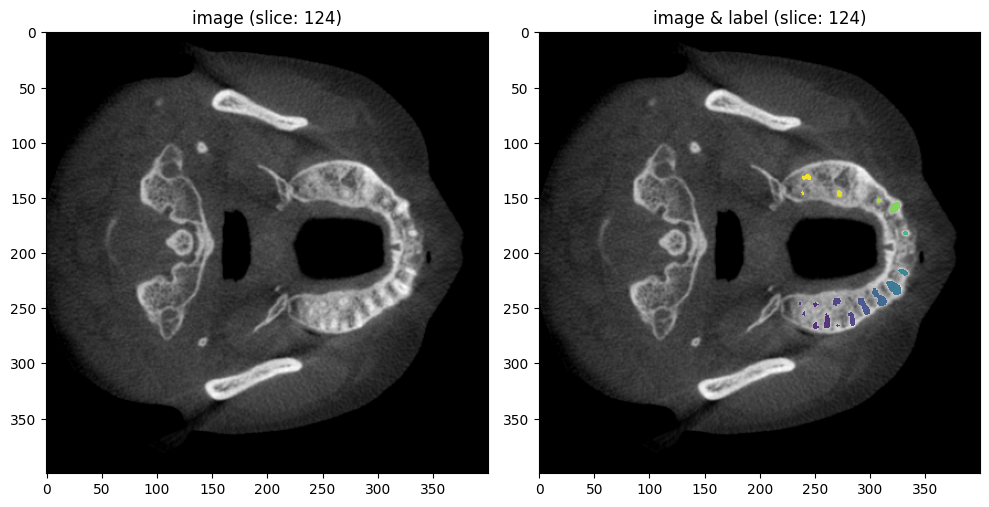

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [14]:
tf_data_info_df = get_data_info(tr_ds, teeth_transform)

In [21]:
from transforms.transform_utils import LabelToBinaryLabeld
space = [0.4, 0.4, 0.4]#data_target_space
a_min=218
a_max=3000
tooth_transform = Compose(
      [
          LoadImaged(keys=["image", "label"]),
          AddChanneld(keys=["image", "label"]),
          LabelToBinaryLabeld(keys=["label"]),
          # LabelToMaskd(keys=["label"], select_labels=[i for i in range(1, 29)]),
          Orientationd(keys=["image", "label"], axcodes="RAS"),
          Spacingd(
              keys=["image", "label"],
              pixdim=space,
              mode=("bilinear", "nearest"),
          ),
          # ScaleIntensityRangePercentilesd(
          #     keys=["image"], lower=1, upper=99, b_min=0.0, b_max=1.0, clip=True
          # ),
          
          # ori used
          # ScaleIntensityRanged(
          #     keys=["image"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True
          # ),
          NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
          
          ToTensord(keys=["image", "label"]),
          SqueezeDimd(keys=["image", "label"]),
      ]
  )

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.


pid: 1001152328_20150714
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001152328_20150714.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [0. 1.]


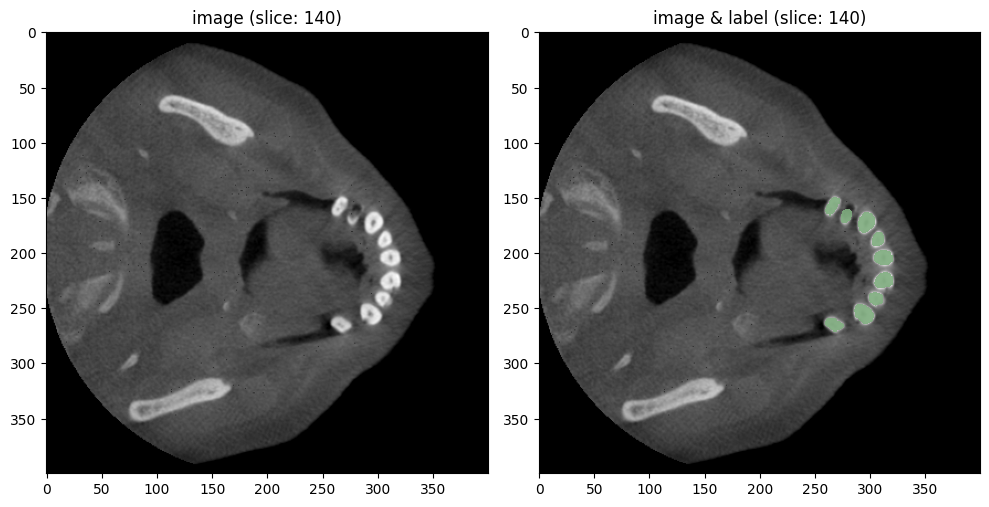

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001162439_20140520
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20140520.nii.gz
img shape: [400, 400, 328]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 328]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [0. 1.]


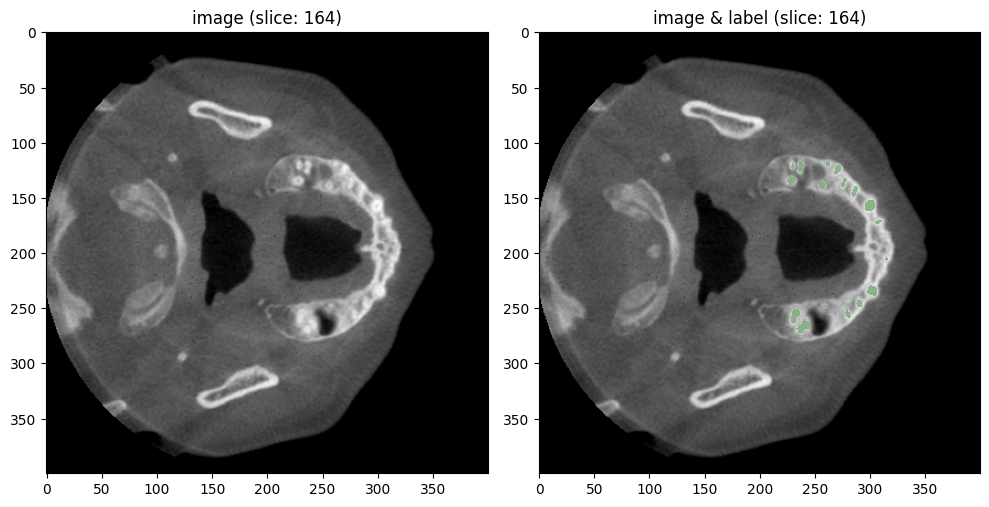

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001162439_20150708
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001162439_20150708.nii.gz
img shape: [400, 400, 272]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 272]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [0. 1.]


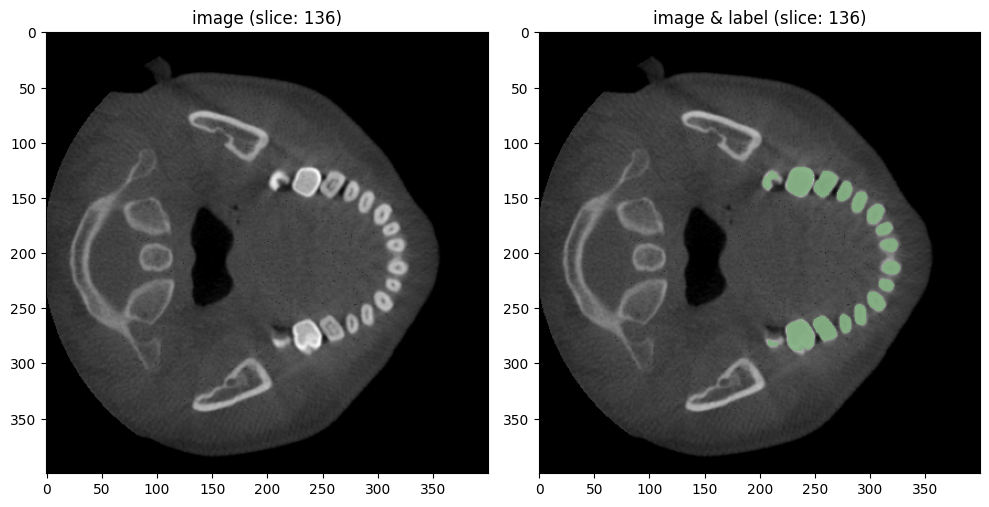

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001172283_20190622
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001172283_20190622.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [0. 1.]


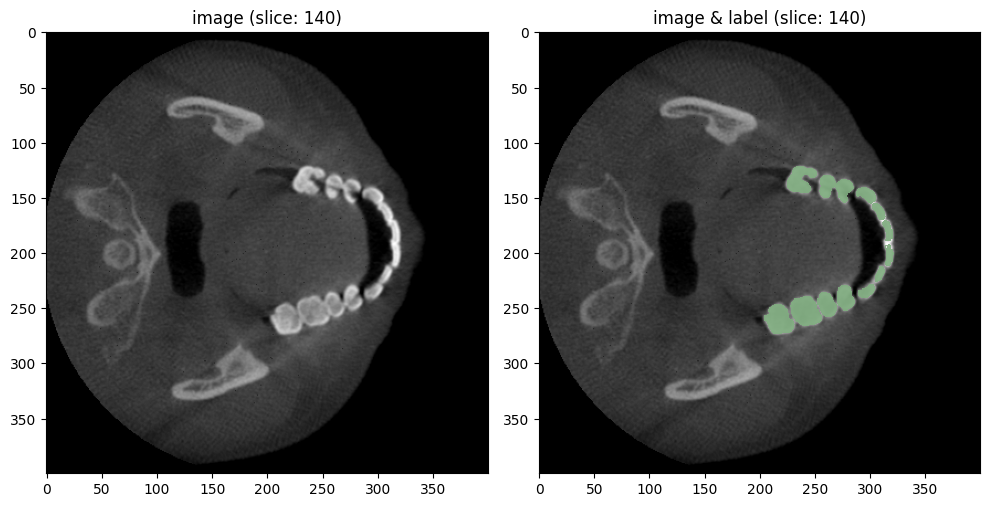

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001213121_20180115
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001213121_20180115.nii.gz
img shape: [400, 400, 280]
img spacing: [0.4, 0.4, 0.40000057]
lbl shape: [400, 400, 280]
lbl spacing: [0.4, 0.4, 0.40000057]
lbl ids: [0. 1.]


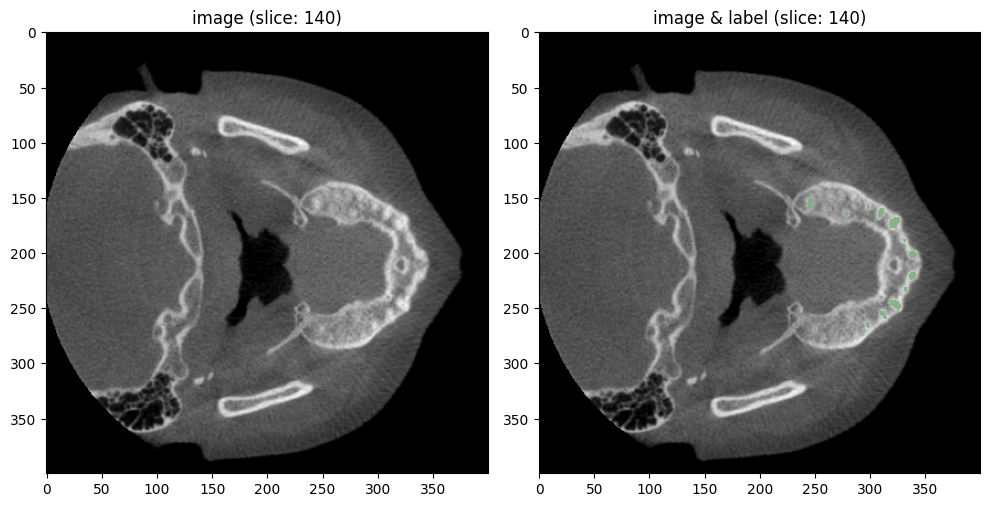

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



pid: 1001218388_20161024
file_pth: /nfs/Workspace/dataset/teeth/cindydata/image/1001218388_20161024.nii.gz
img shape: [400, 400, 264]
img spacing: [0.4, 0.4, 0.39999962]
lbl shape: [400, 400, 264]
lbl spacing: [0.4, 0.4, 0.39999962]
lbl ids: [0. 1.]


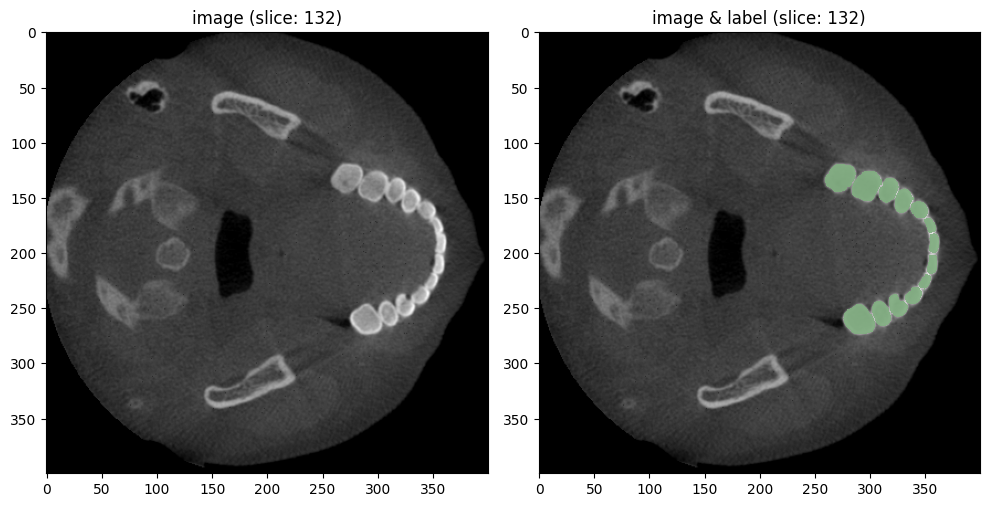

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


KeyboardInterrupt: 

In [22]:
tf_data_info_df = get_data_info(tr_ds, tooth_transform)

## Check train/val dataloader

In [5]:
from data_utils.dataset import DataLoader
from expers.args import get_parser
from data_utils.visualization import show_img_lbl

In [6]:
data_dir = '/nfs/Workspace/dataset/teeth/cindydata'
data_json = os.path.join(data_dir, 'data.json')

In [10]:
args = get_parser([])
args.data_name = 'tooth'
args.data_dir = data_dir
args.data_dicts_json = data_json
args.scale_intensity_type='range'
args.select_label_num=29
args.a_min=218
args.a_max=3187
args.roi_x=96
args.roi_y=96
args.roi_z=96
args.space_x=0.4
args.space_y=0.4
args.space_z=0.4

In [11]:
tr_ld, val_dl = DataLoader(args.data_name, args)

use scale intensity by range
use scale intensity by range
load json from /nfs/Workspace/dataset/teeth/cindydata/data.json
train files (11): ['1001152328_20150714', '1001162439_20140520', '1001162439_20150708', '1001172283_20190622', '1001213121_20180115', '1001218388_20161024', '1001223657_20180112', '1001263197_20180115', '1001275319_20180114', '1001277267_20180112', '1001377656_20171105']
val files (10): ['1001377656_20180116', '1001381644_20180112', '1001382496_20180112', '1001382496_20180423', '1001382496_20201206', '1001384881_20180110', '1001398270_20180111', '1001470164_20180114', '1001484858_20150118', '1001484858_20180109']
test files (5): ['1001486953_20180109', '1001487462_20170505', '1001487462_20180109', '1001487462_20180527', '1001487462_20190427']

load train dataset ...


Loading dataset: 100%|██████████| 11/11 [00:29<00:00,  2.70s/it]



load val dataset ...


Loading dataset: 100%|██████████| 10/10 [00:26<00:00,  2.63s/it]


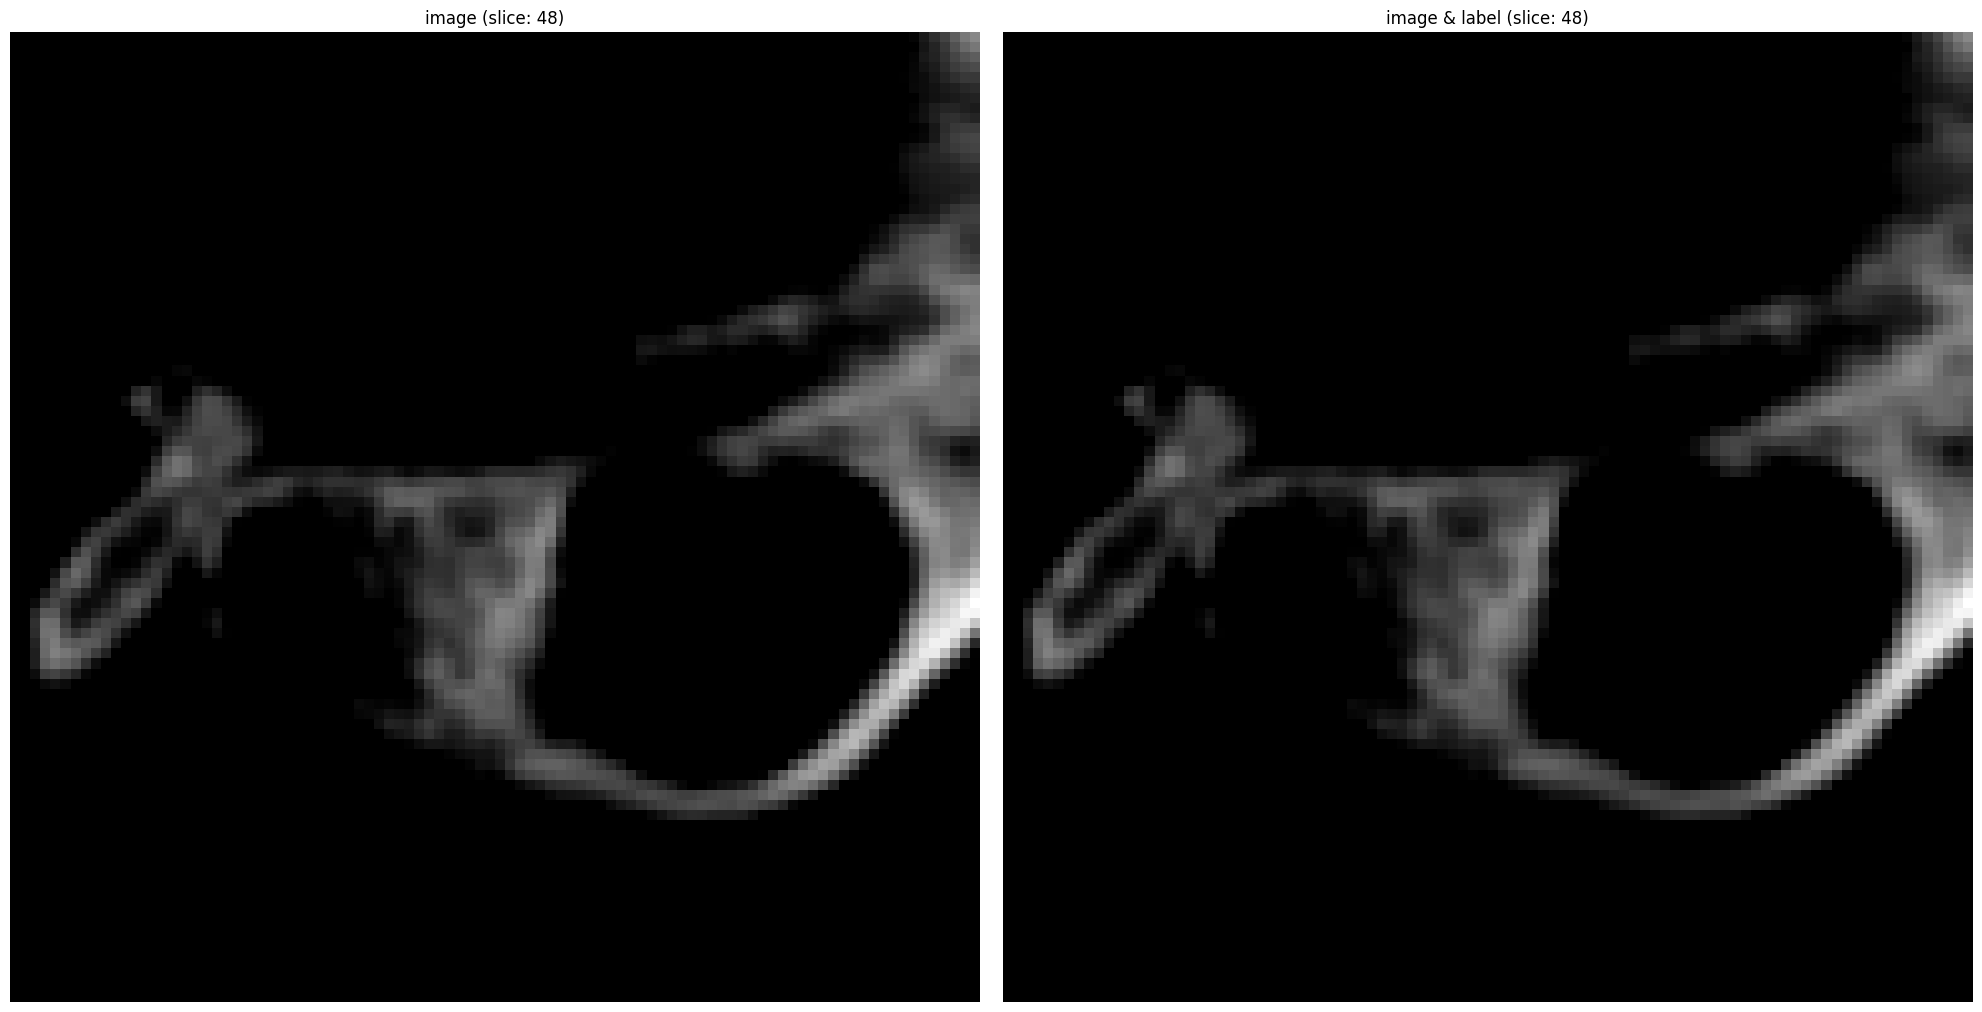

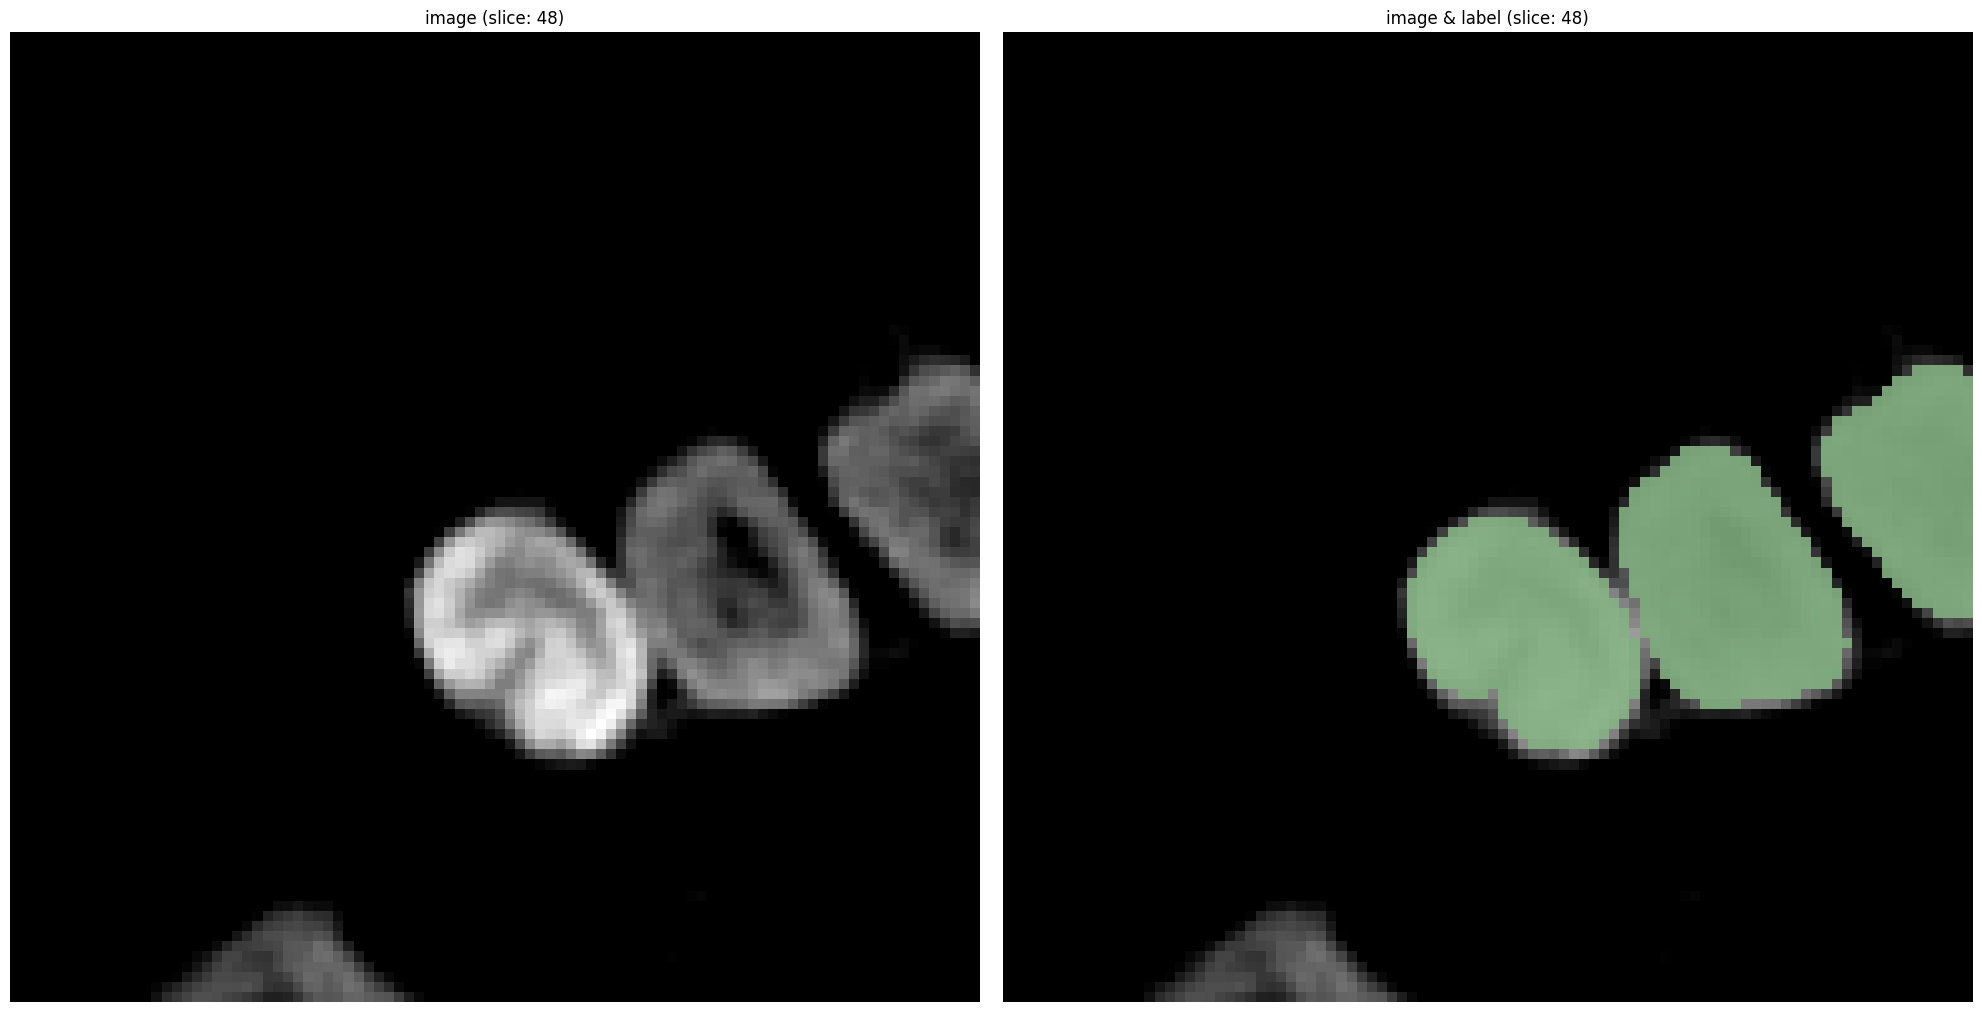

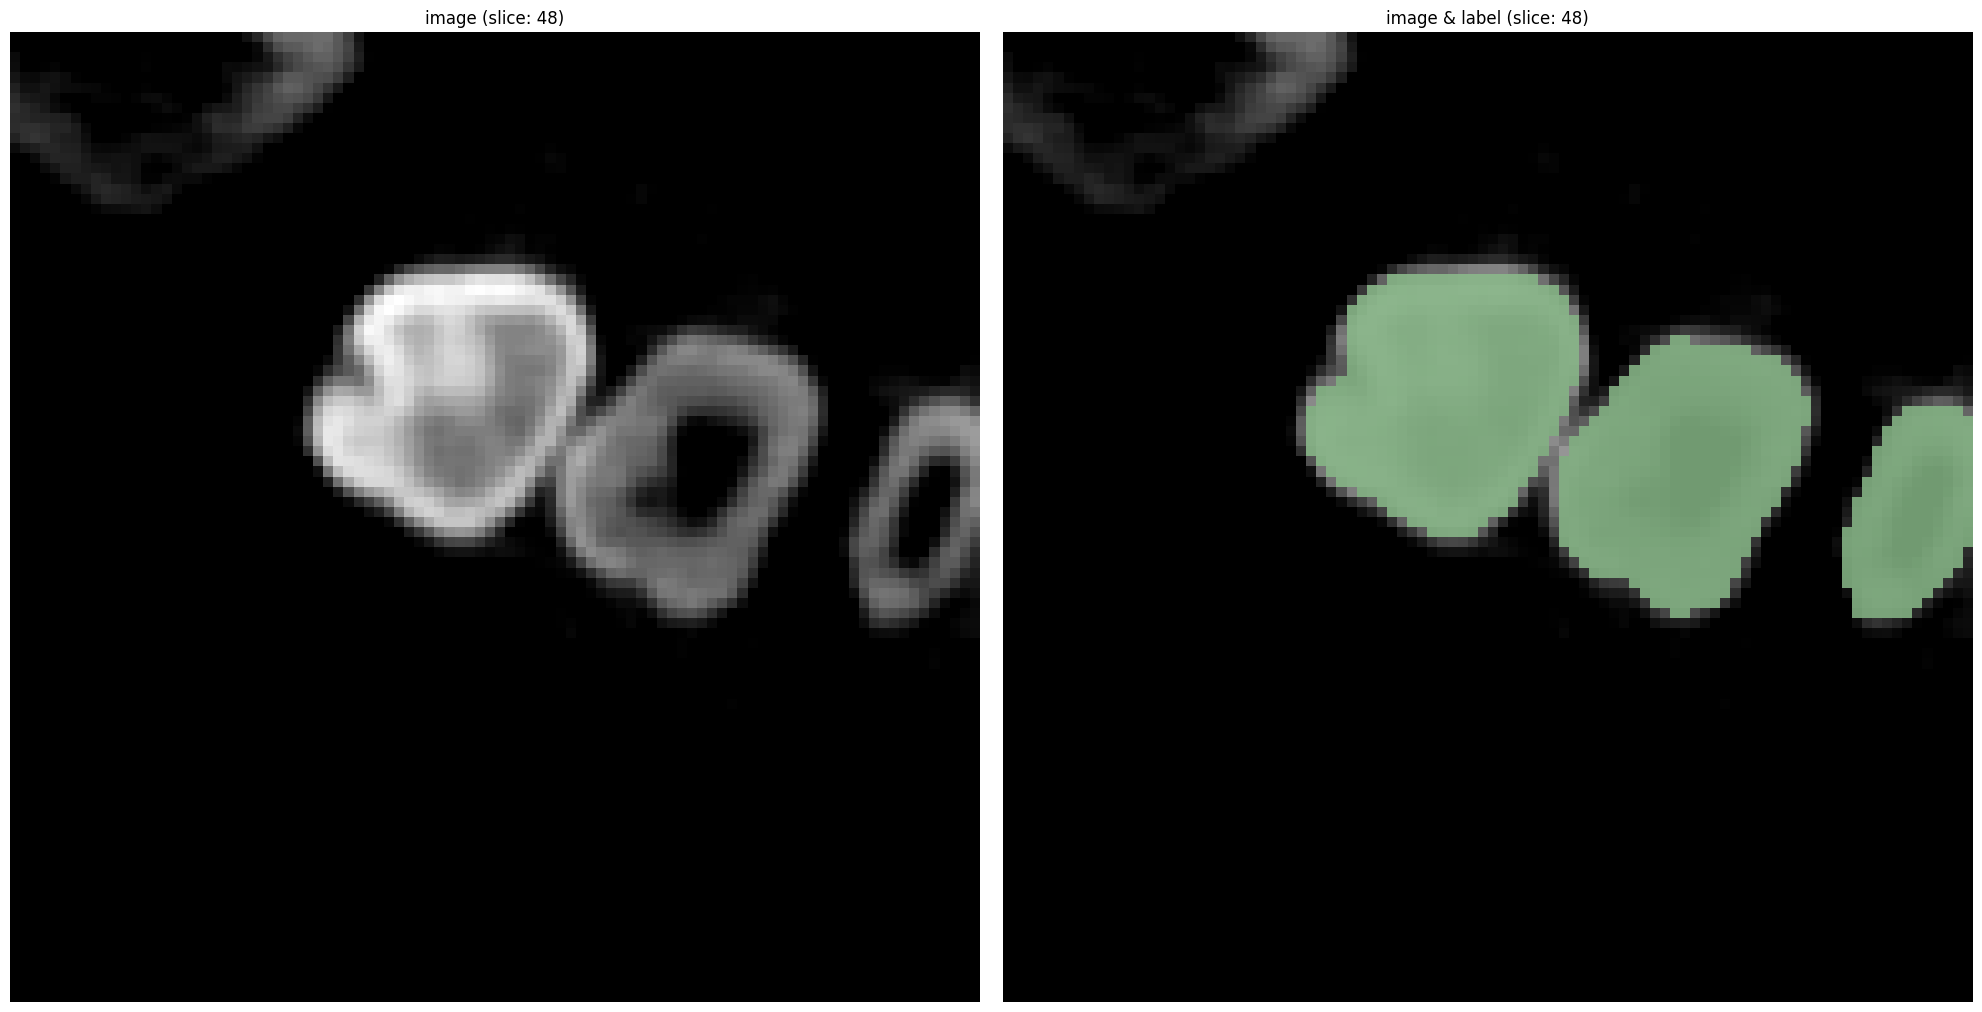

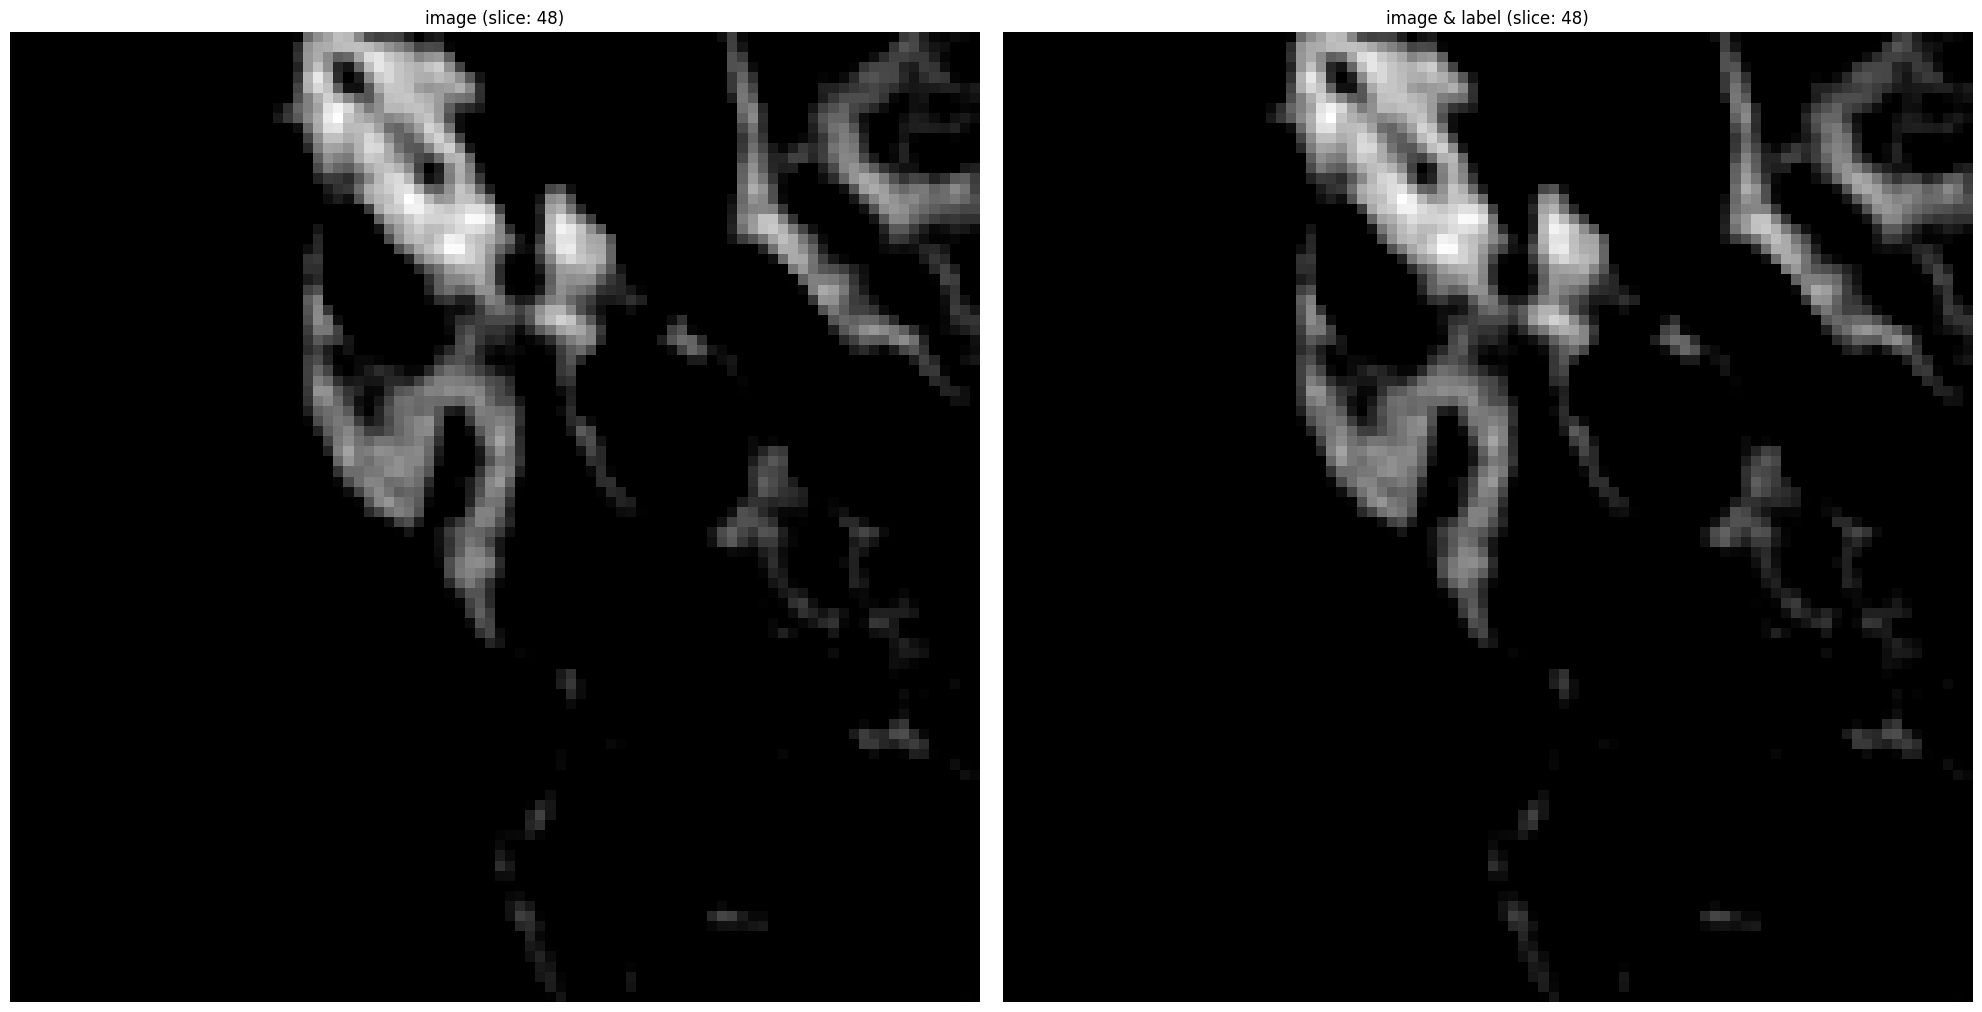

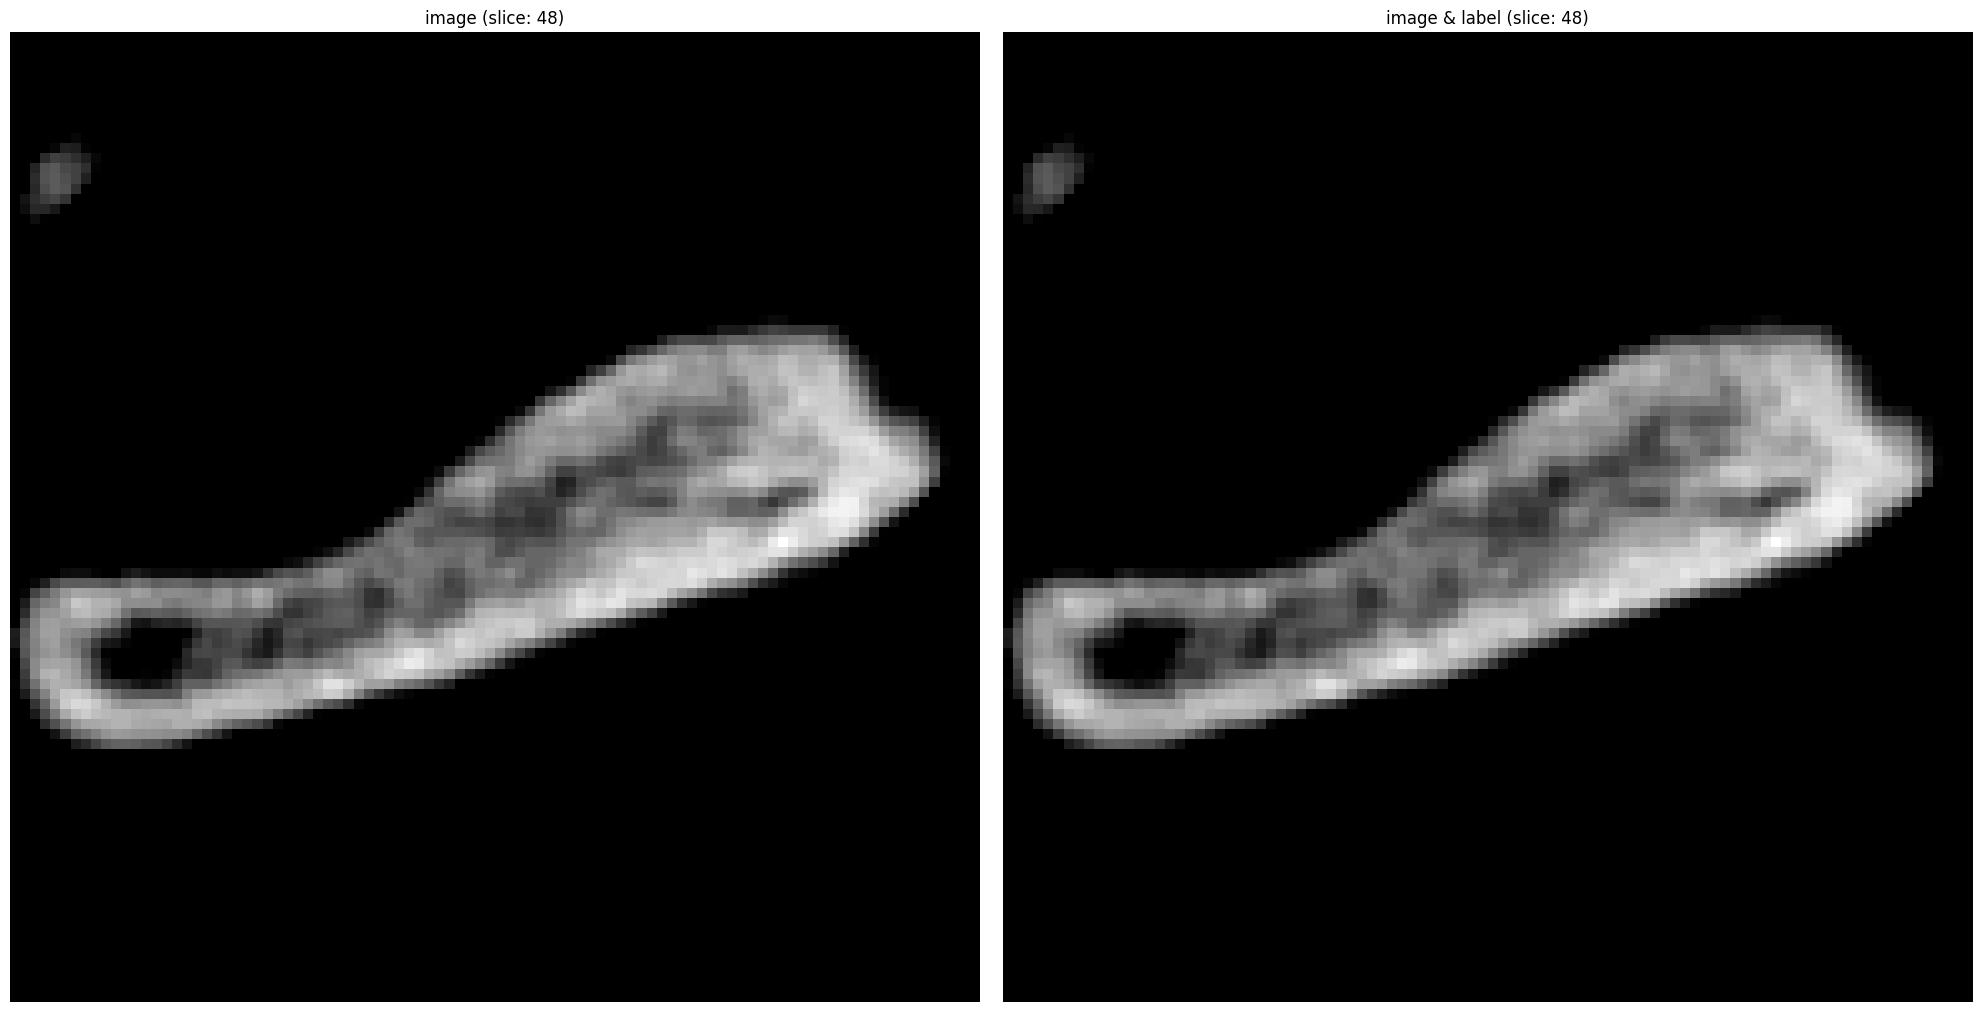

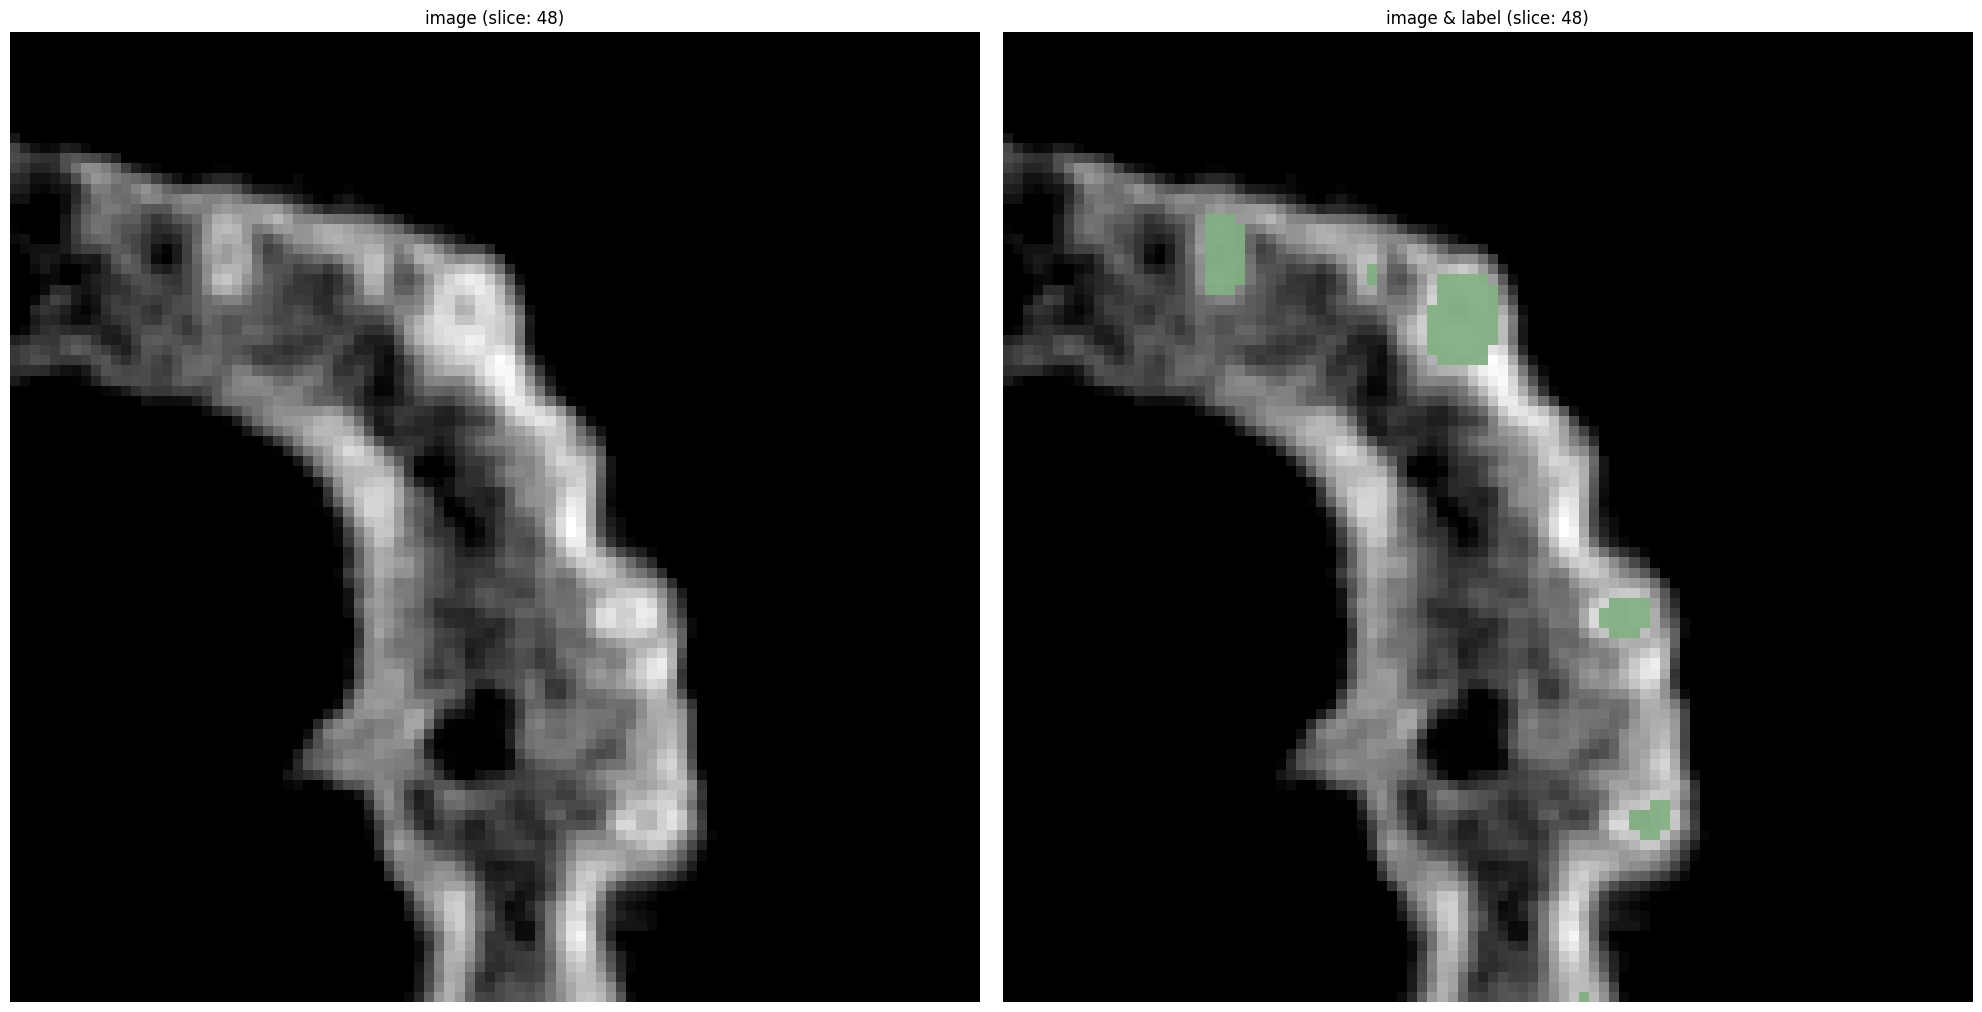

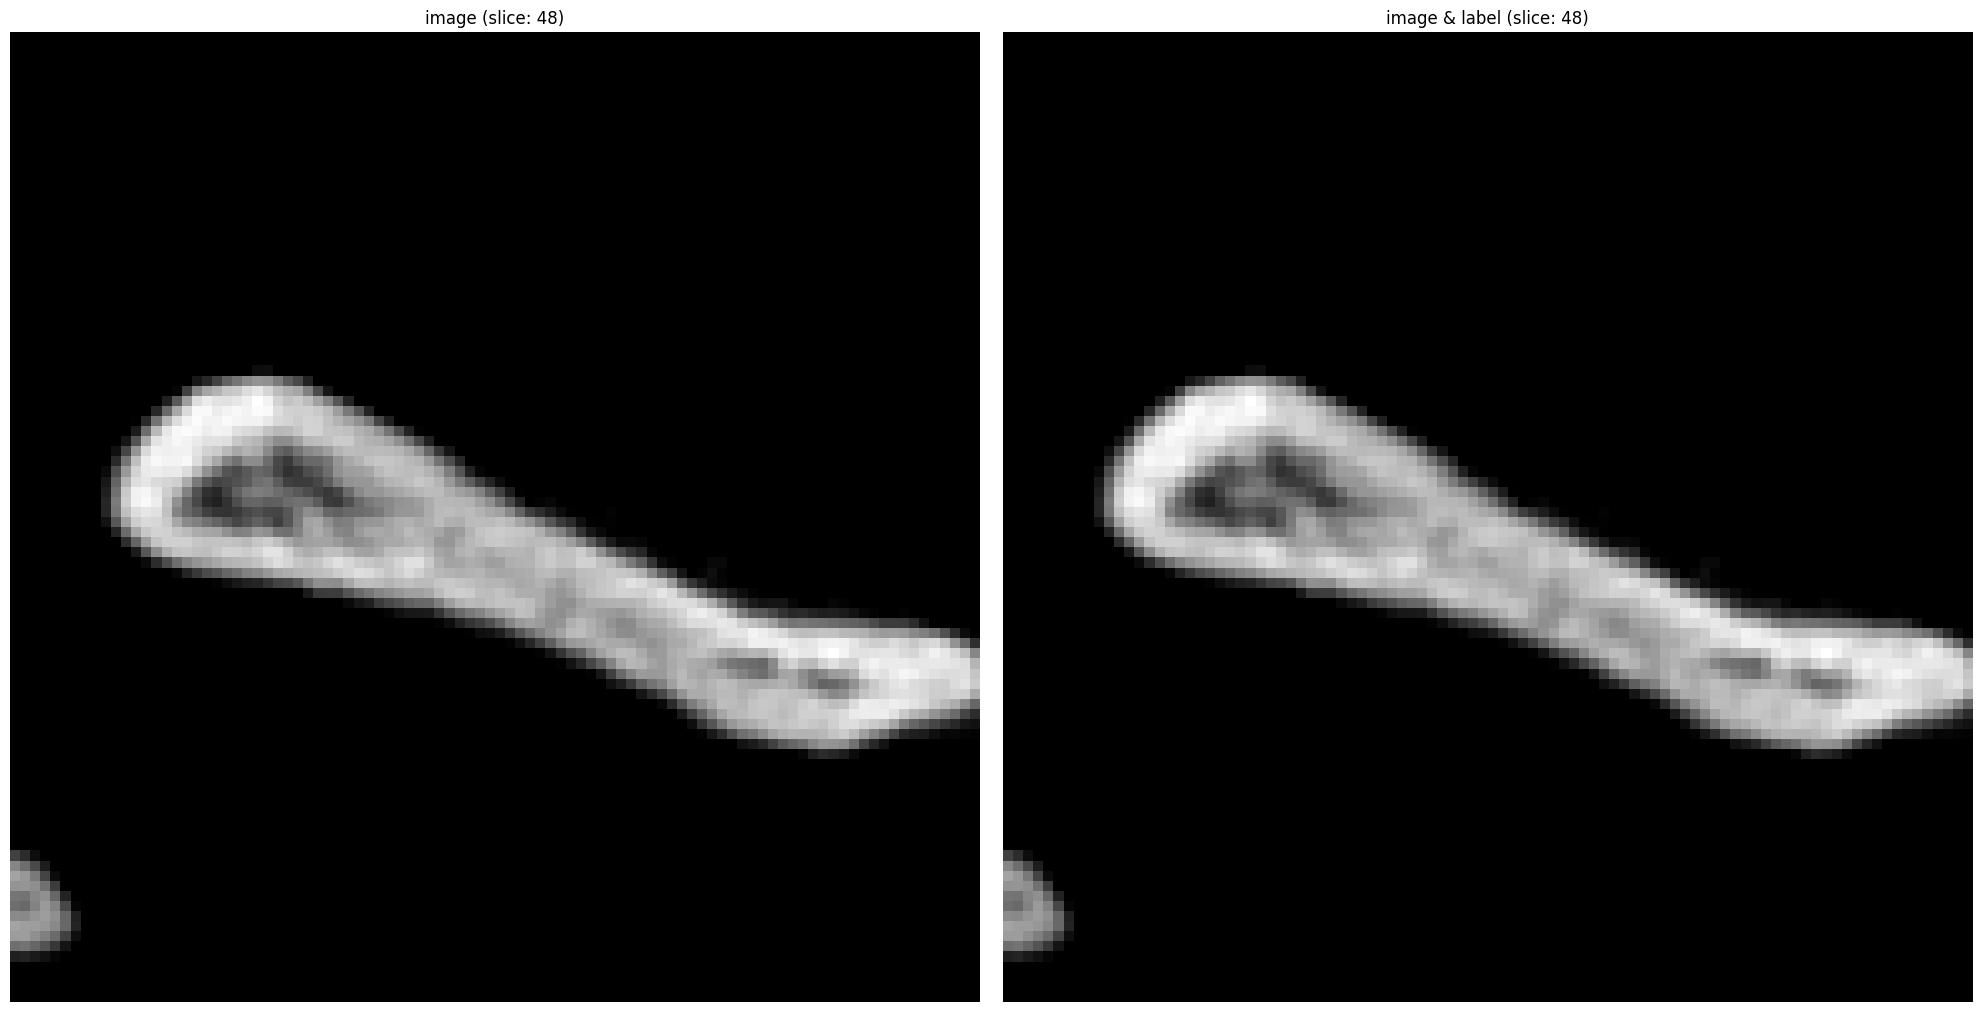

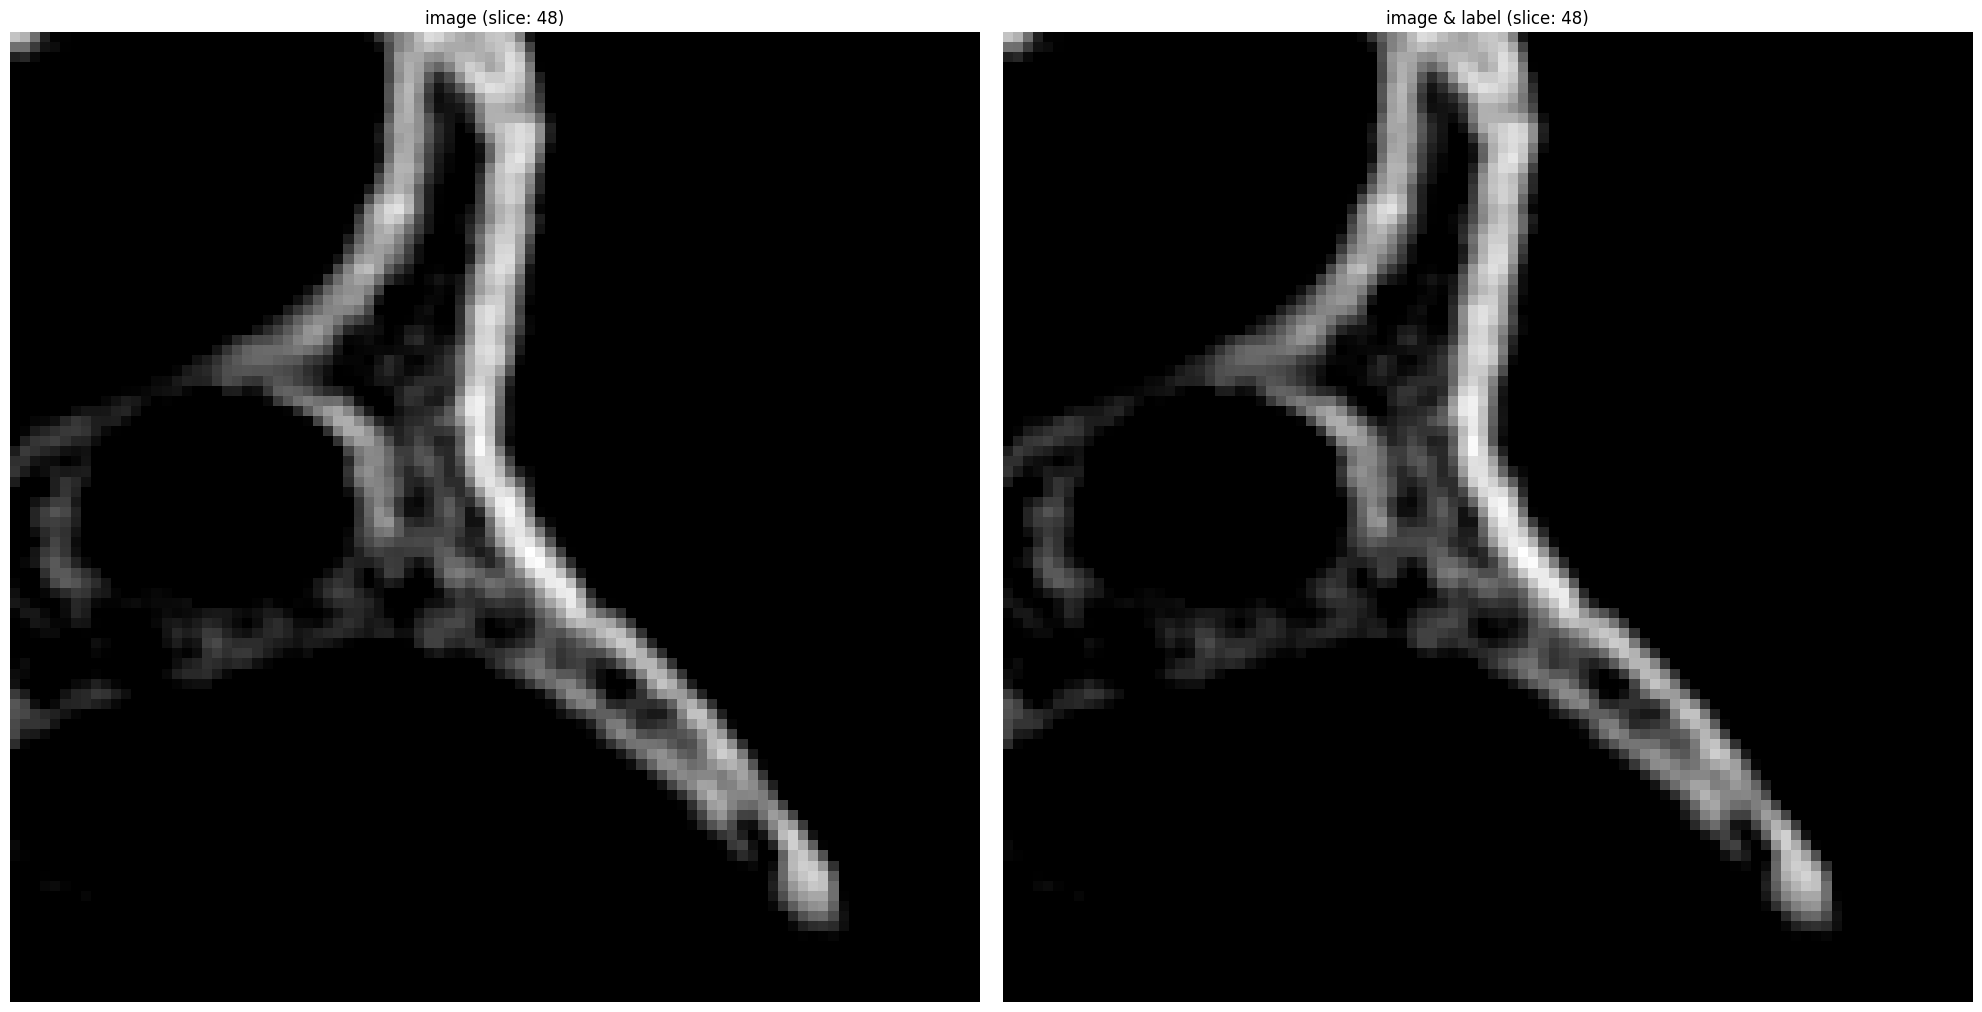

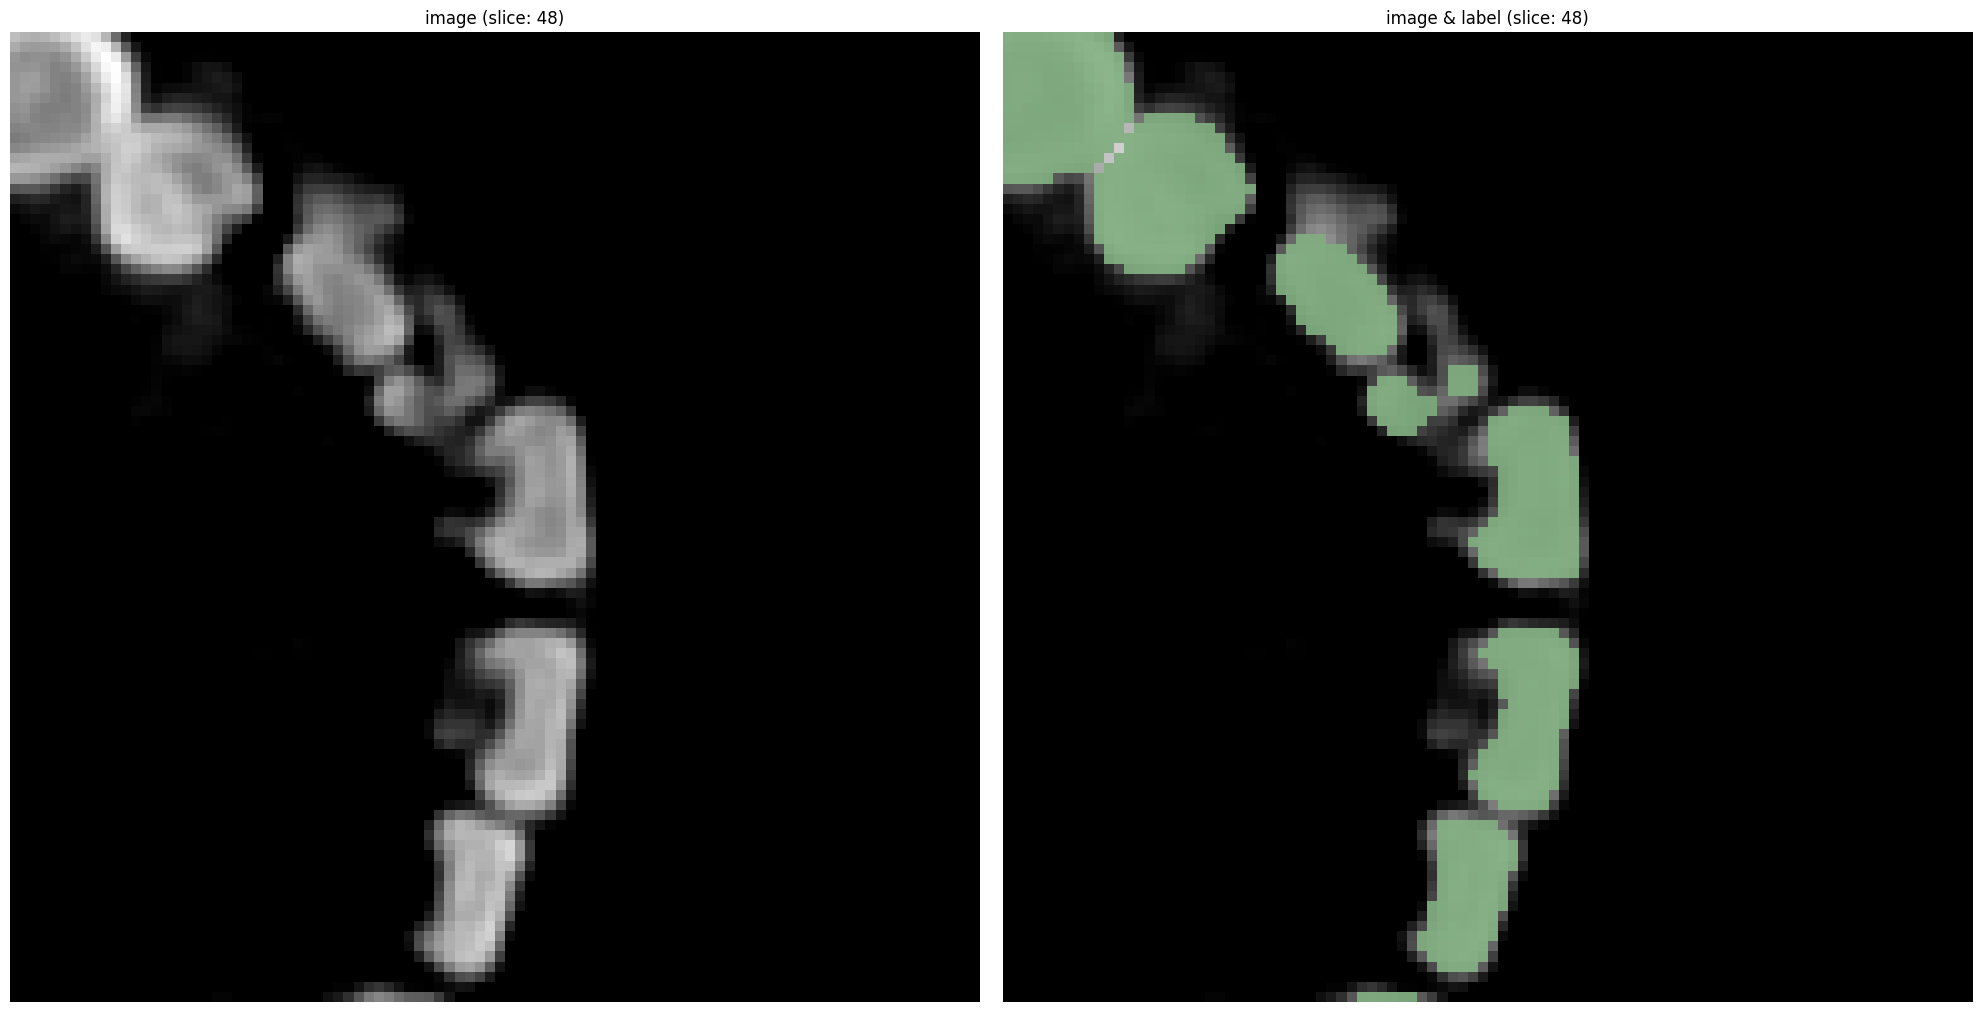

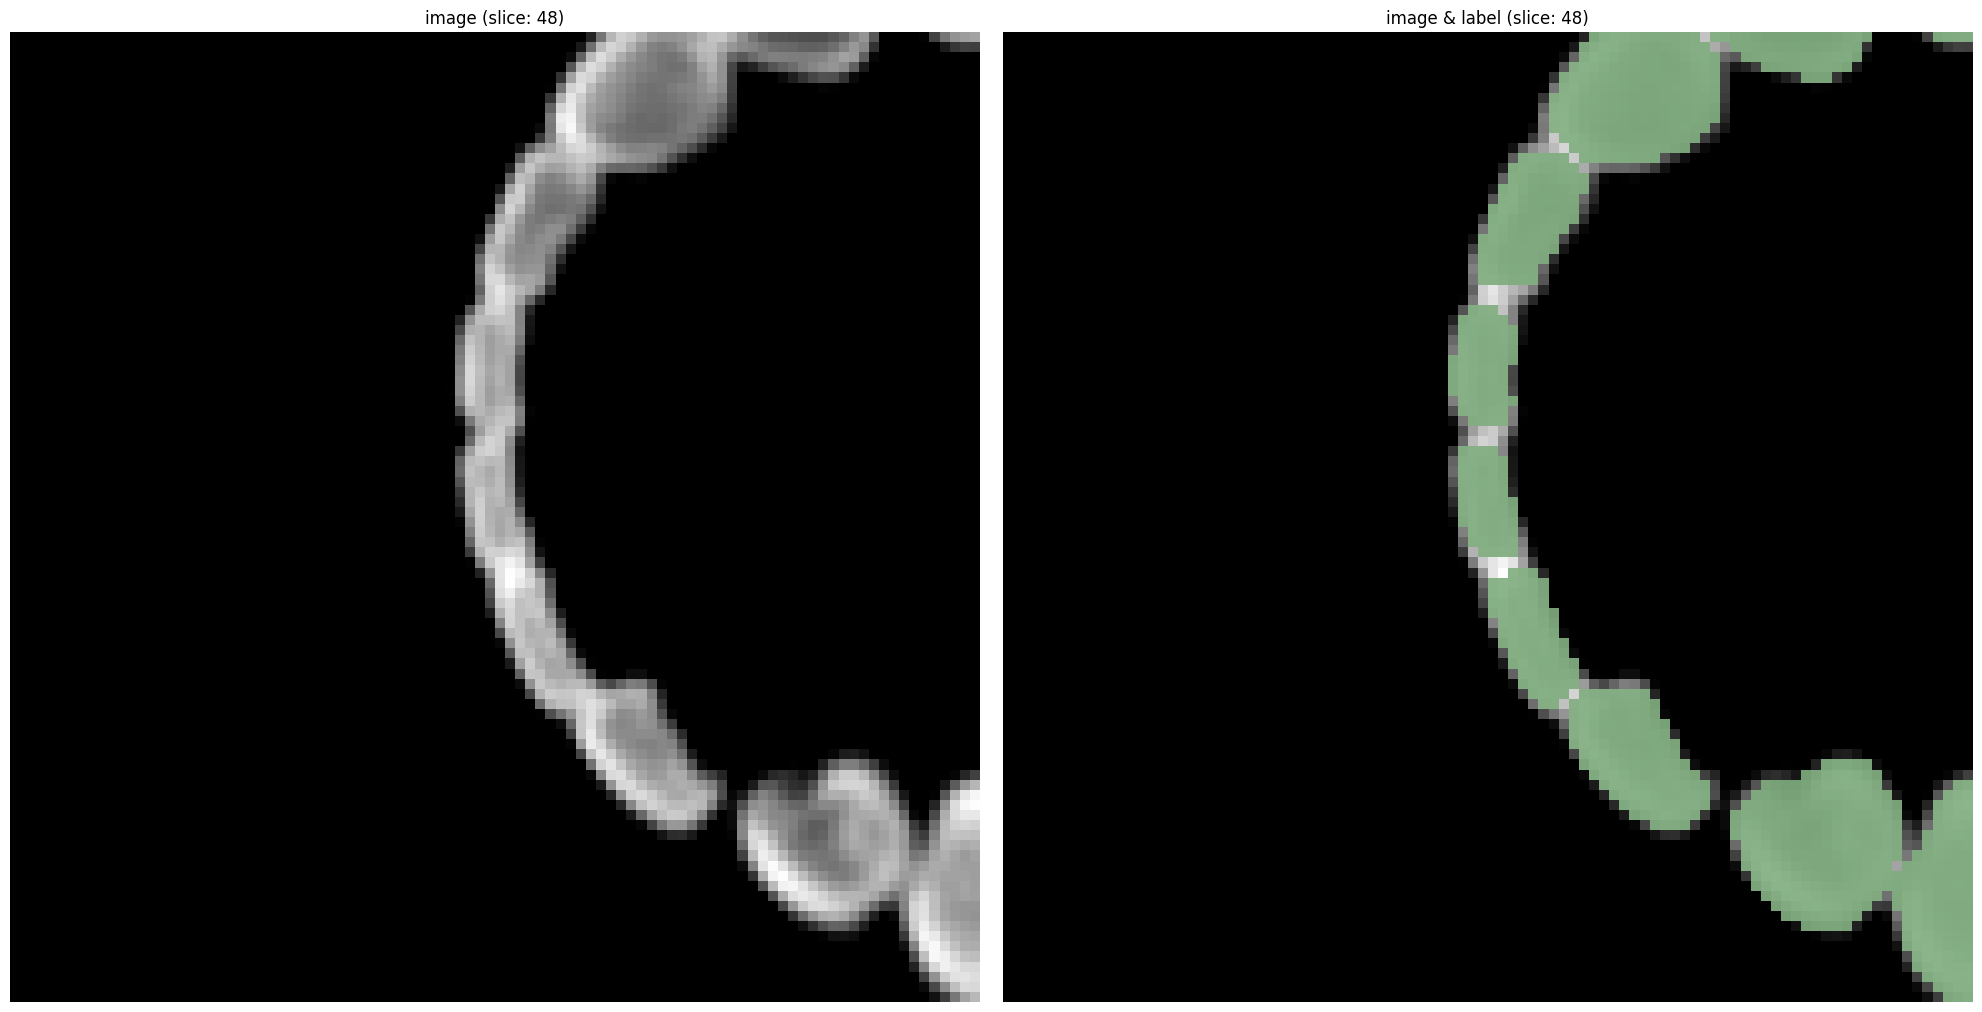

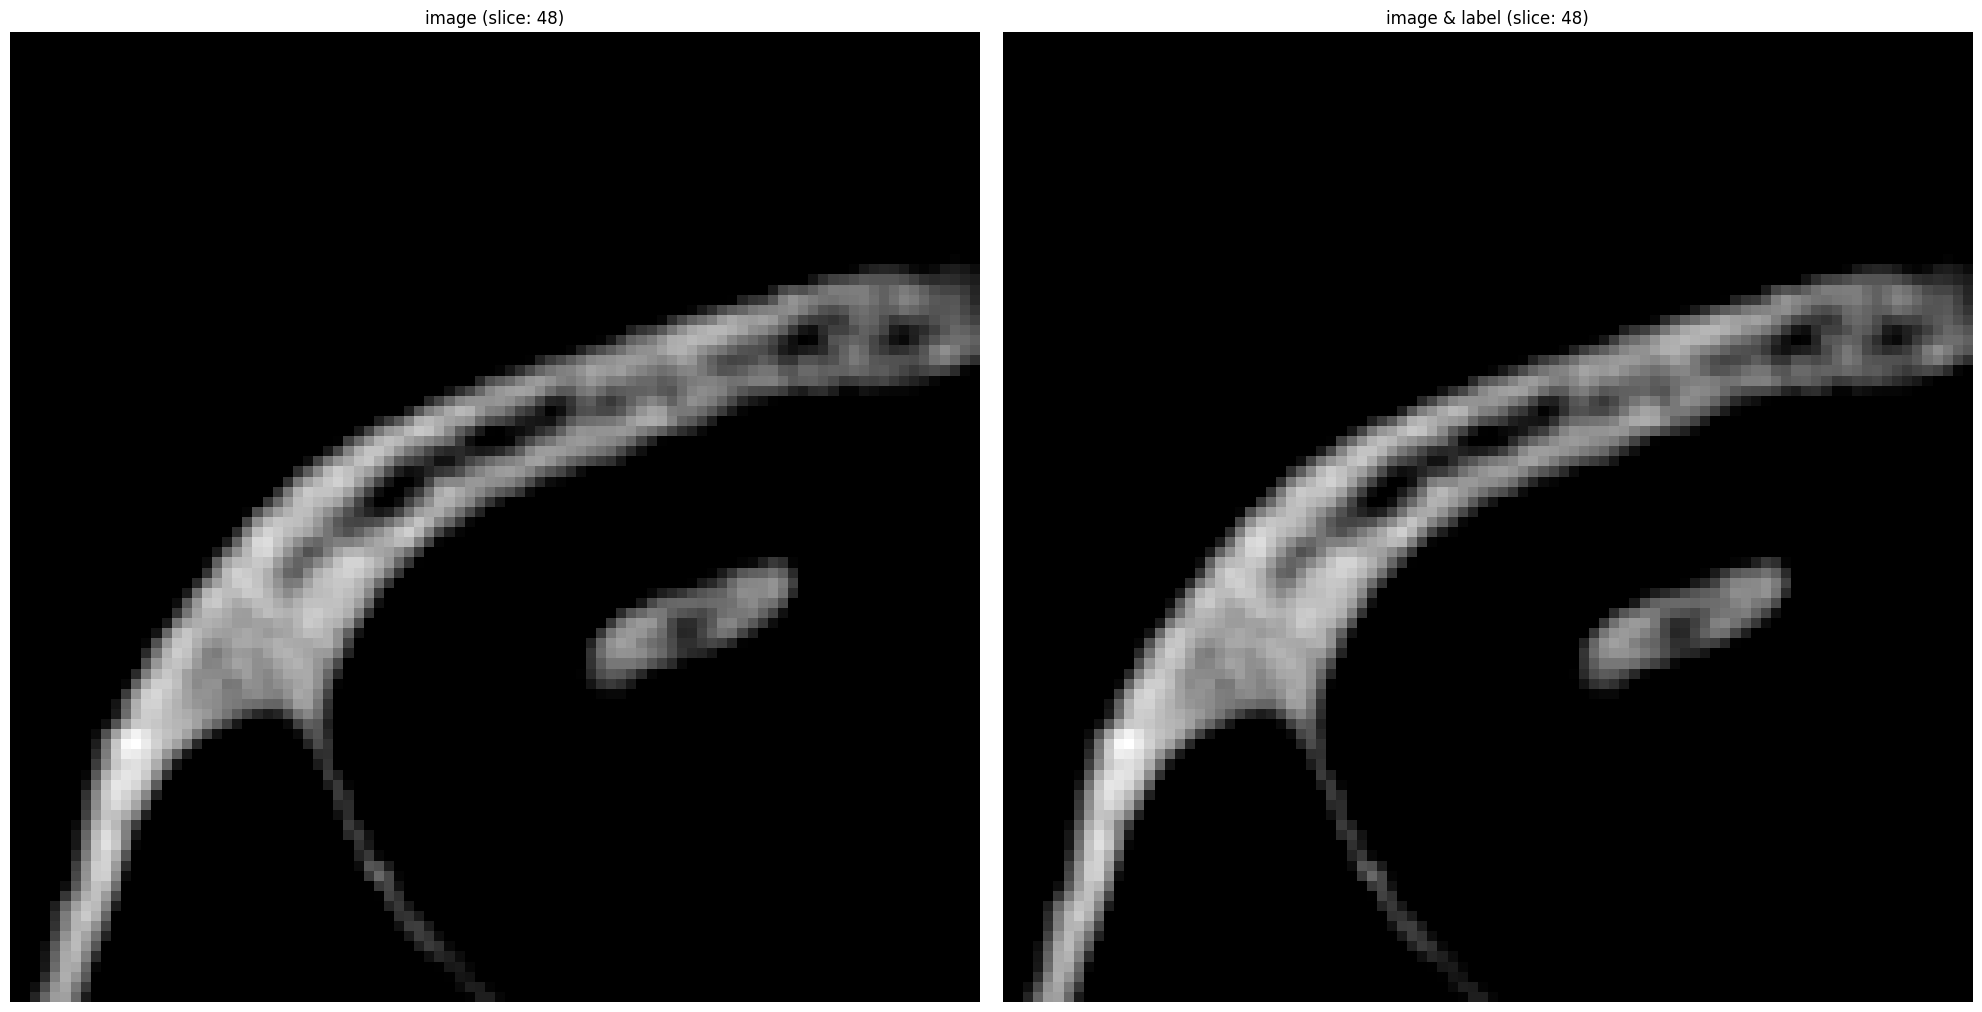

In [12]:
slice_idx = 48
num_classes = 2
for d in tr_ld:
    show_img_lbl(
        d['image'][0,0,:,:,slice_idx], 
        d['label'][0,0,:,:,slice_idx], 
        slice_idx=slice_idx,
        num_classes=num_classes
    )

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.


use scale intensity by range
use scale intensity by range
load json from /nfs/Workspace/dataset/teeth/cindydata/data.json
train files (11): ['1001152328_20150714', '1001162439_20140520', '1001162439_20150708', '1001172283_20190622', '1001213121_20180115', '1001218388_20161024', '1001223657_20180112', '1001263197_20180115', '1001275319_20180114', '1001277267_20180112', '1001377656_20171105']
val files (10): ['1001377656_20180116', '1001381644_20180112', '1001382496_20180112', '1001382496_20180423', '1001382496_20201206', '1001384881_20180110', '1001398270_20180111', '1001470164_20180114', '1001484858_20150118', '1001484858_20180109']
test files (5): ['1001486953_20180109', '1001487462_20170505', '1001487462_20180109', '1001487462_20180527', '1001487462_20190427']

load train dataset ...


Loading dataset: 100%|██████████| 11/11 [00:31<00:00,  2.87s/it]



load val dataset ...


Loading dataset: 100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


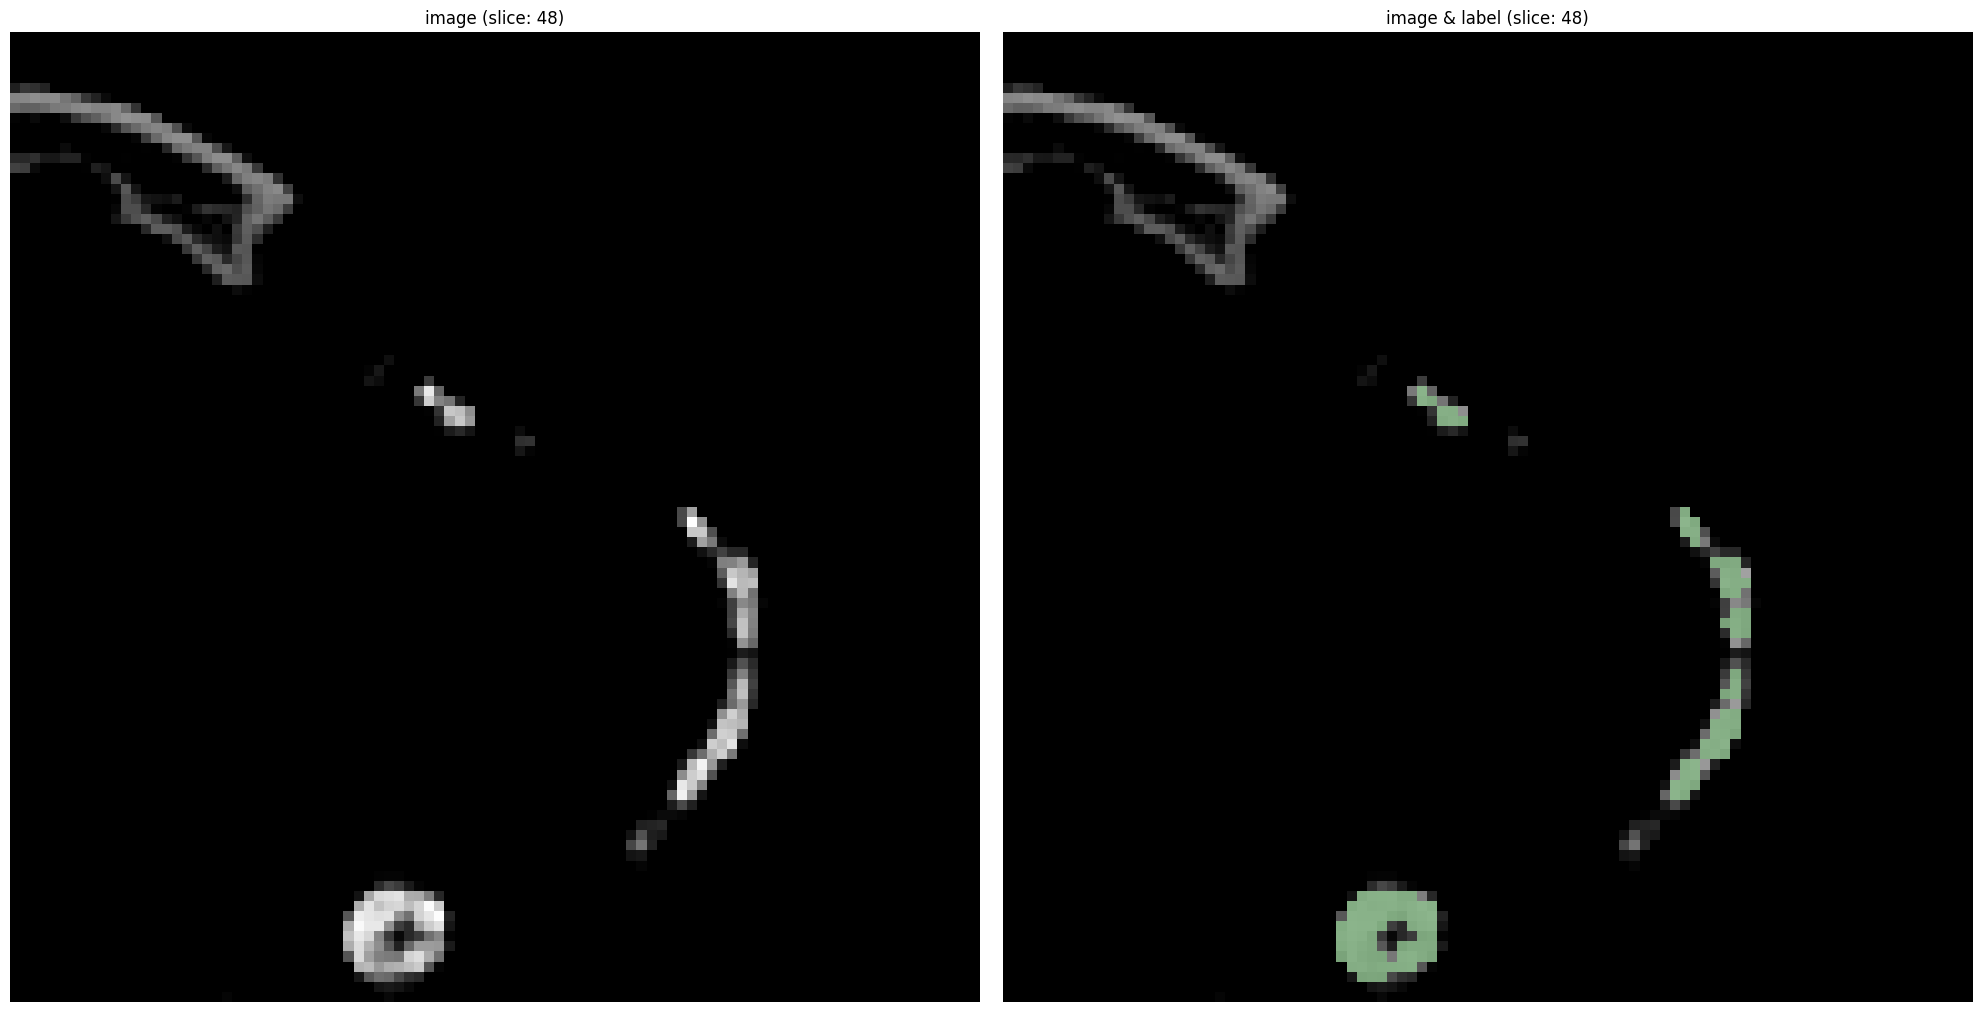

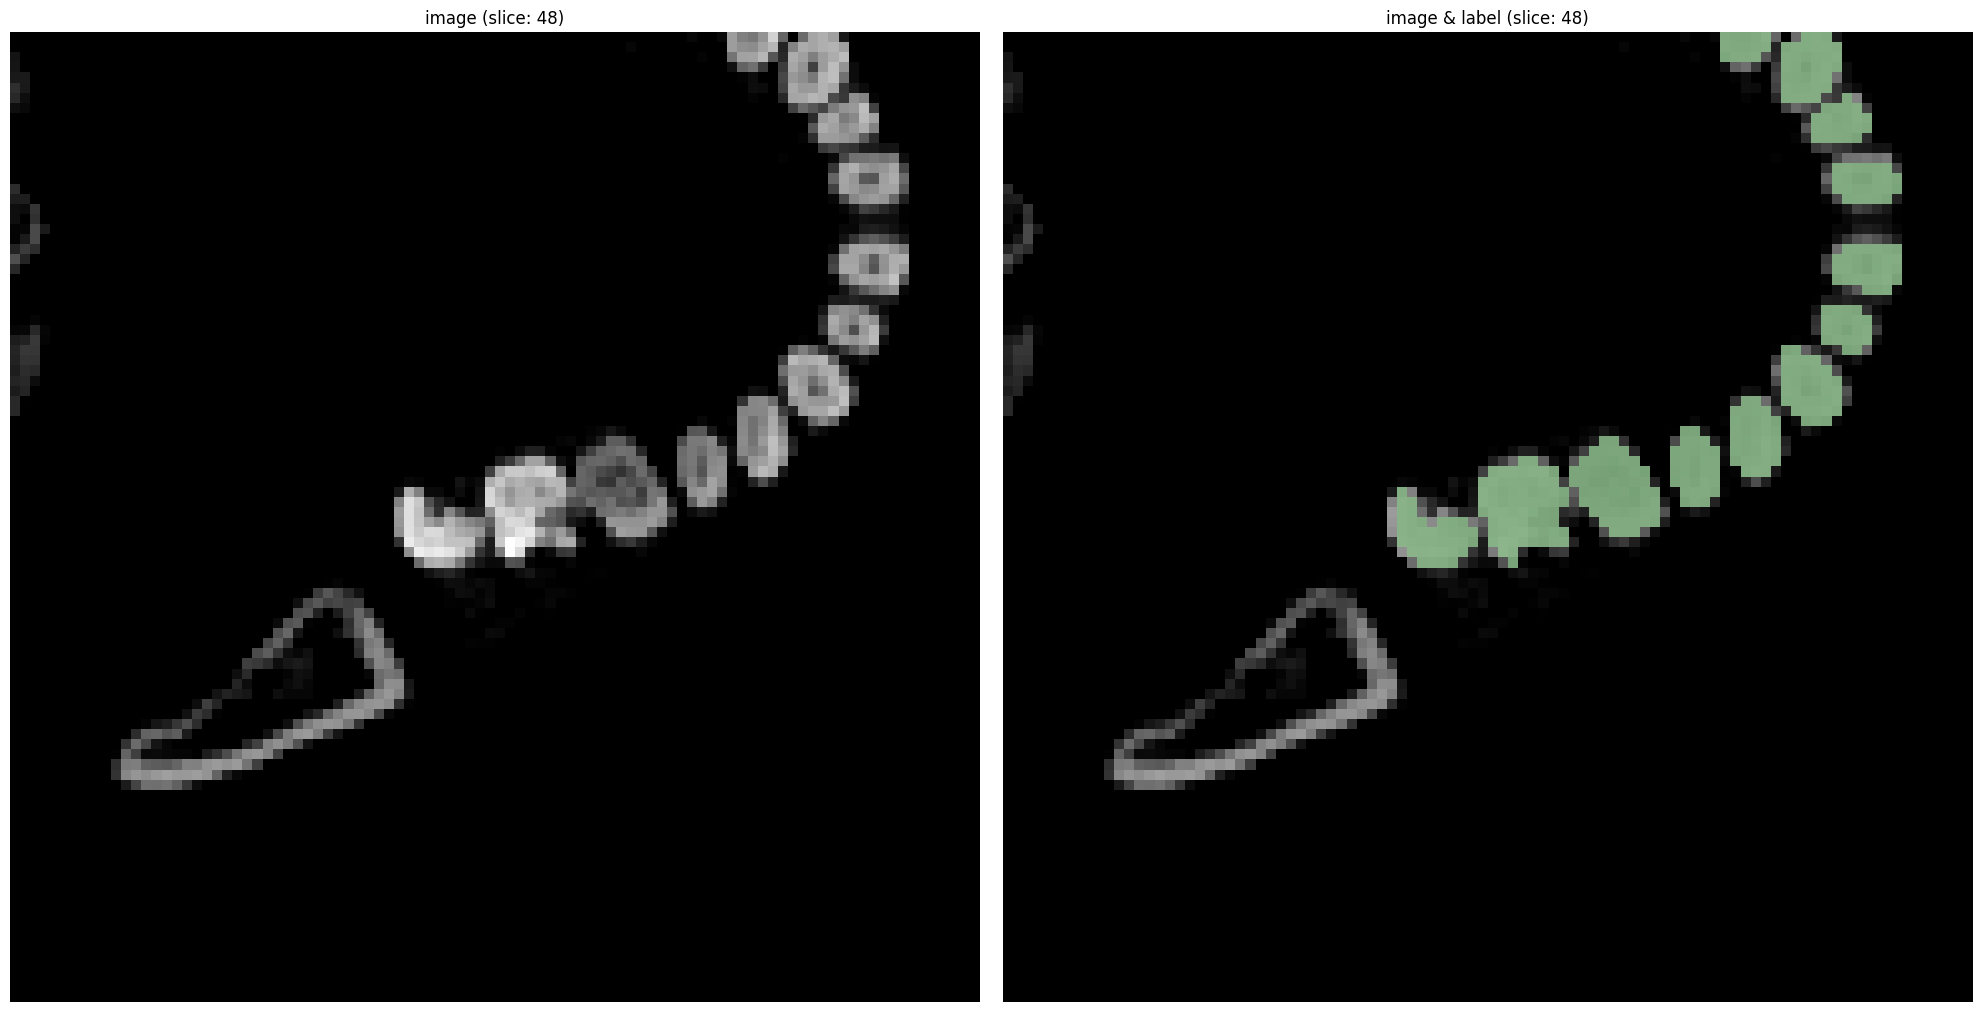

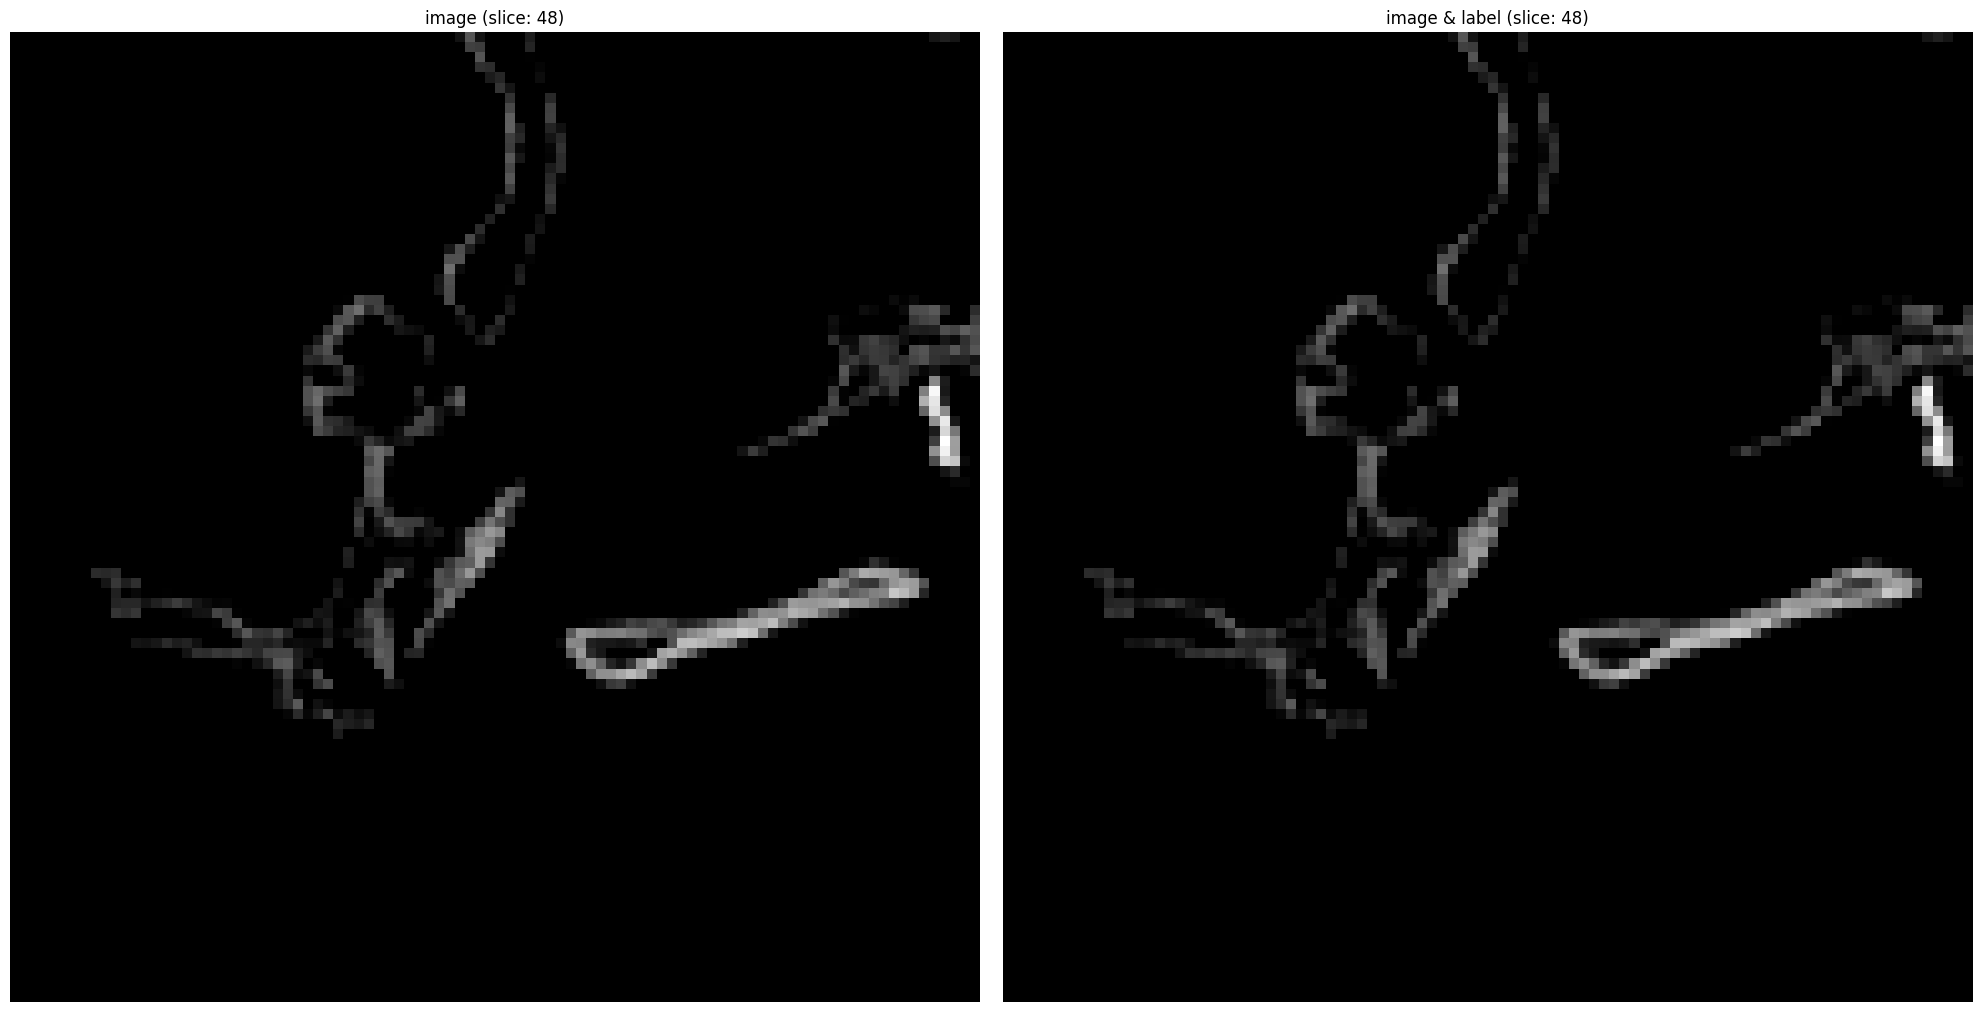

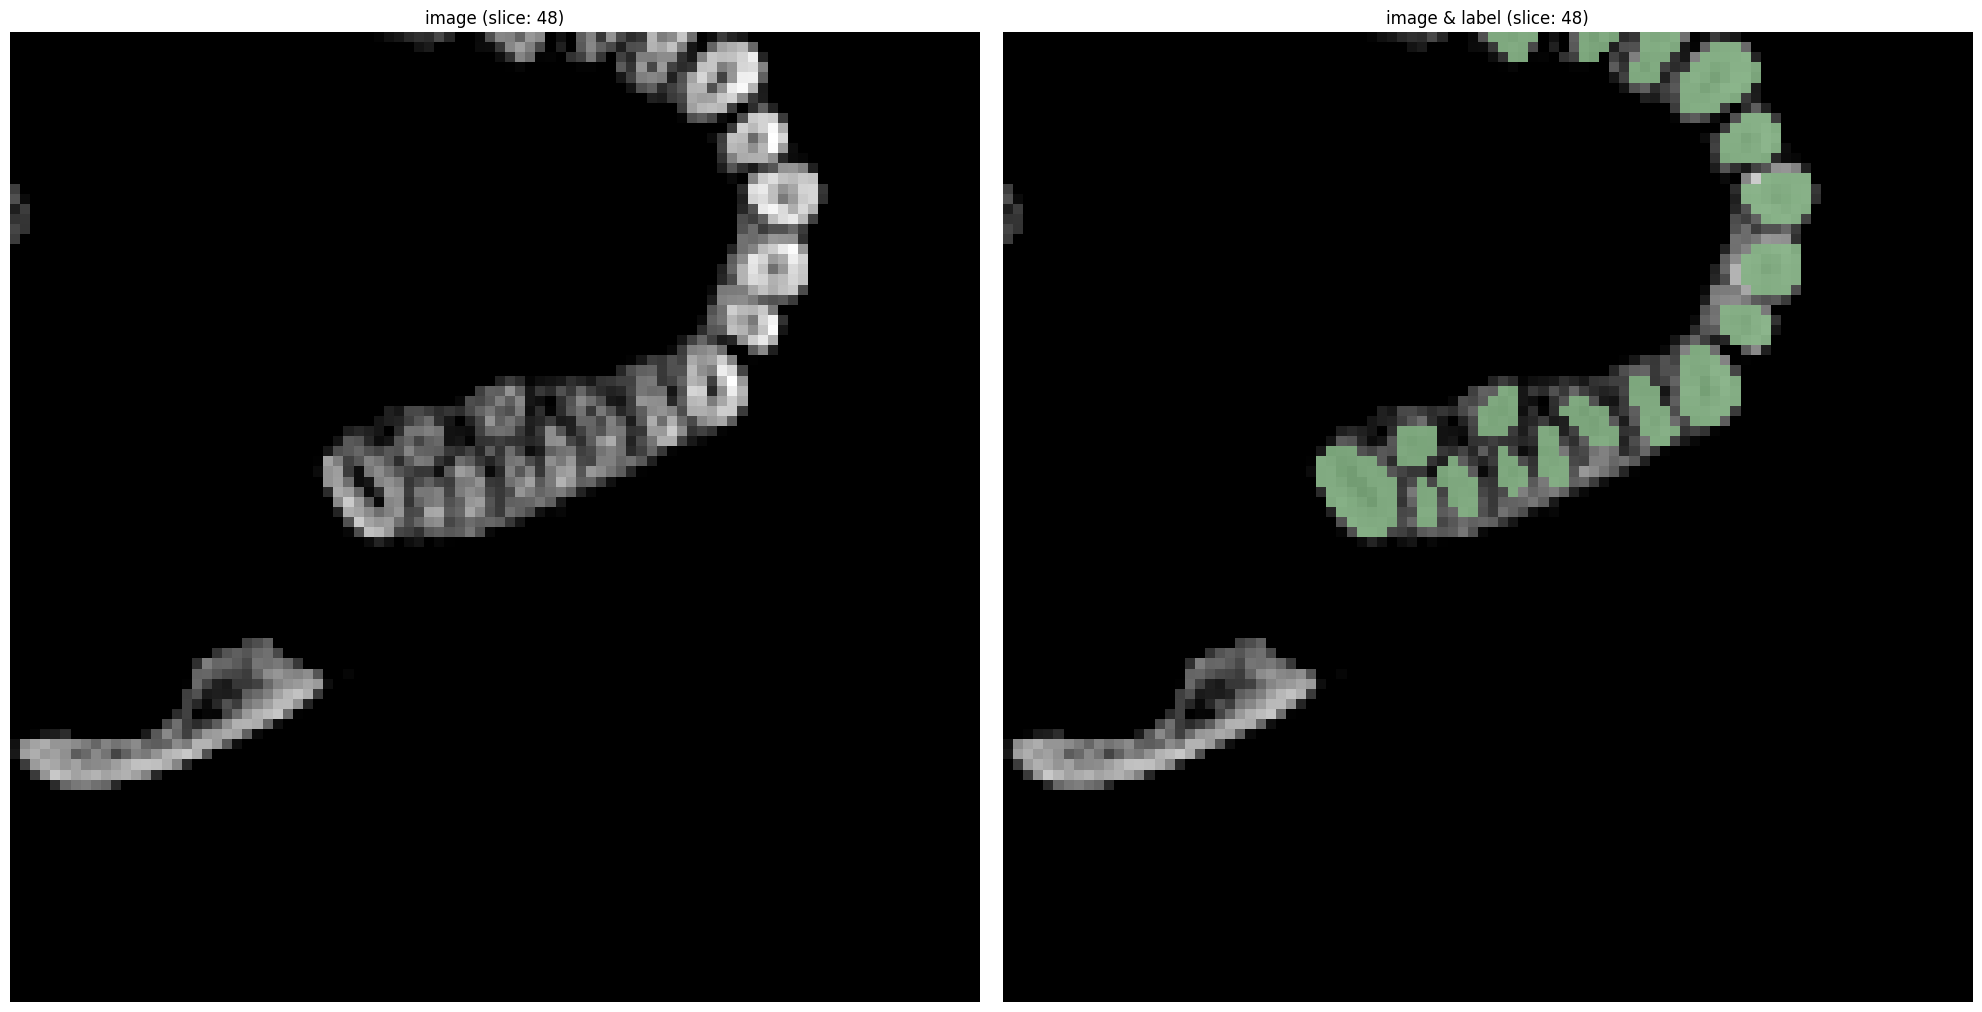

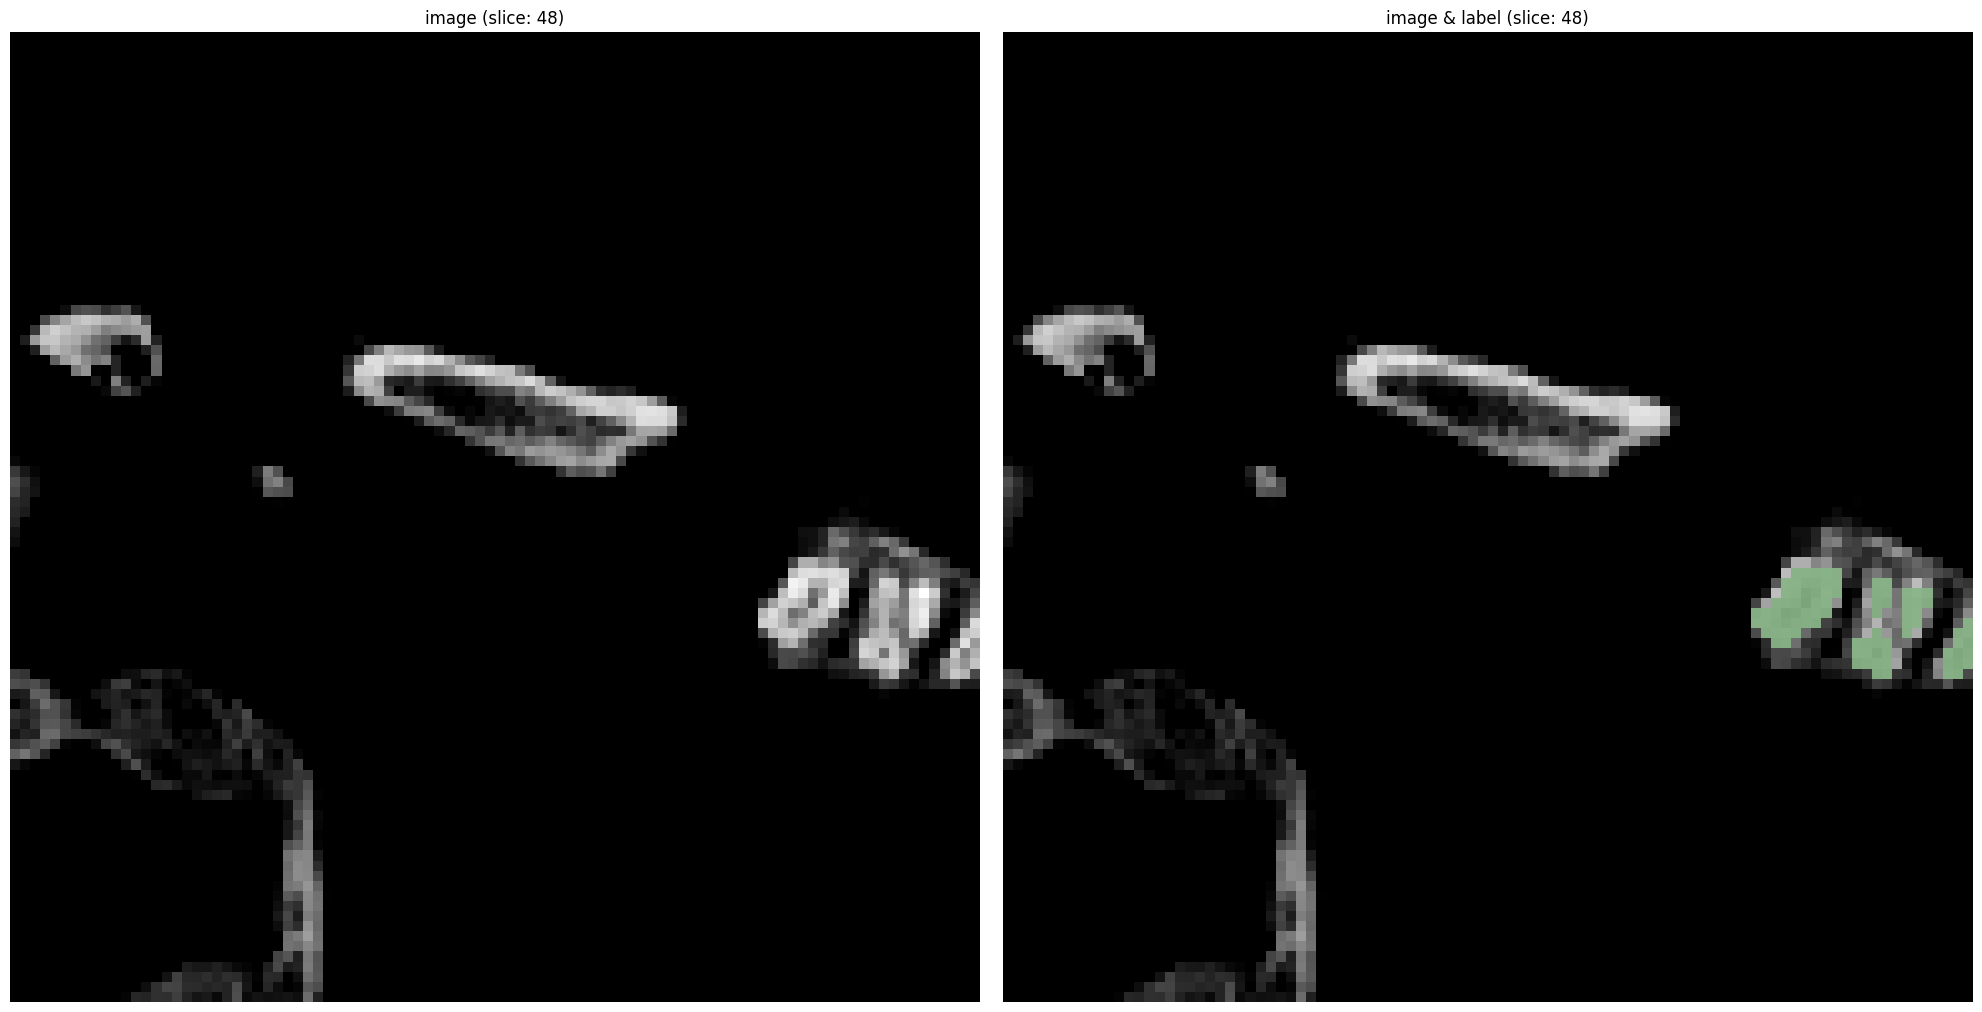

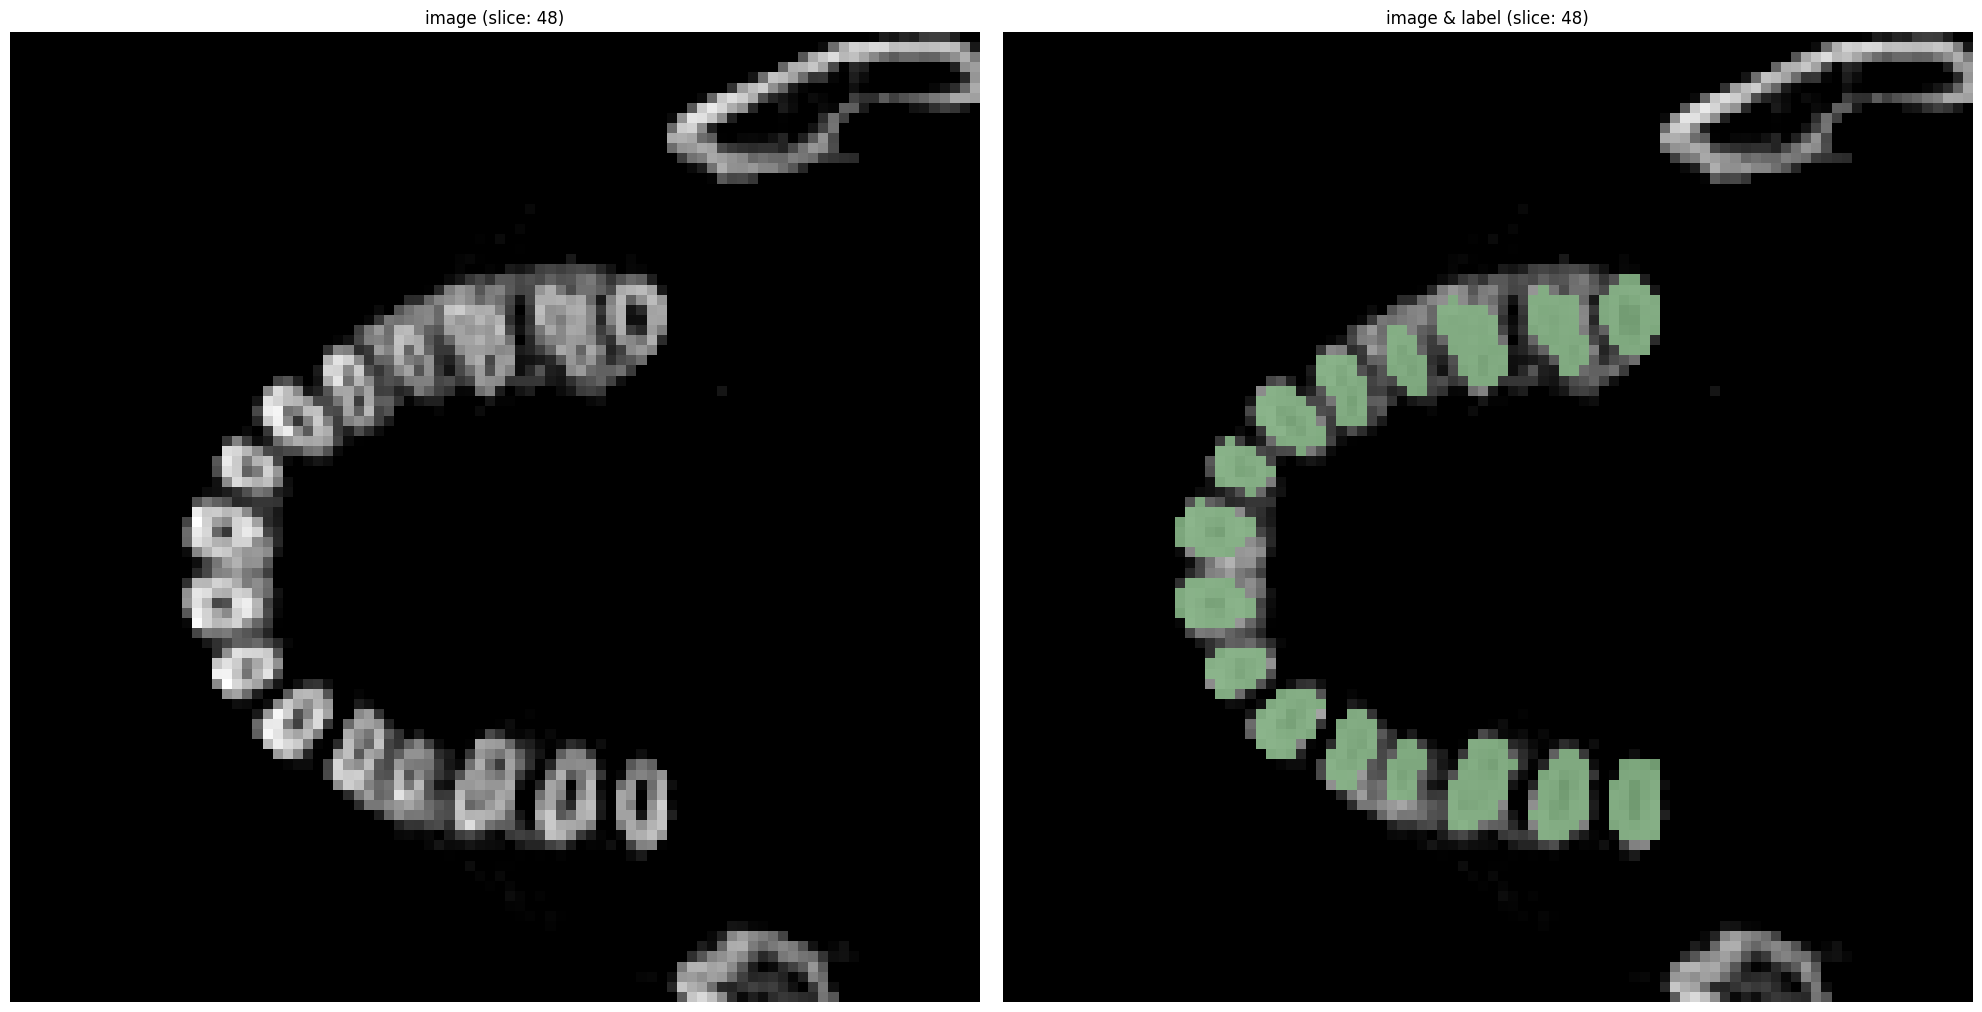

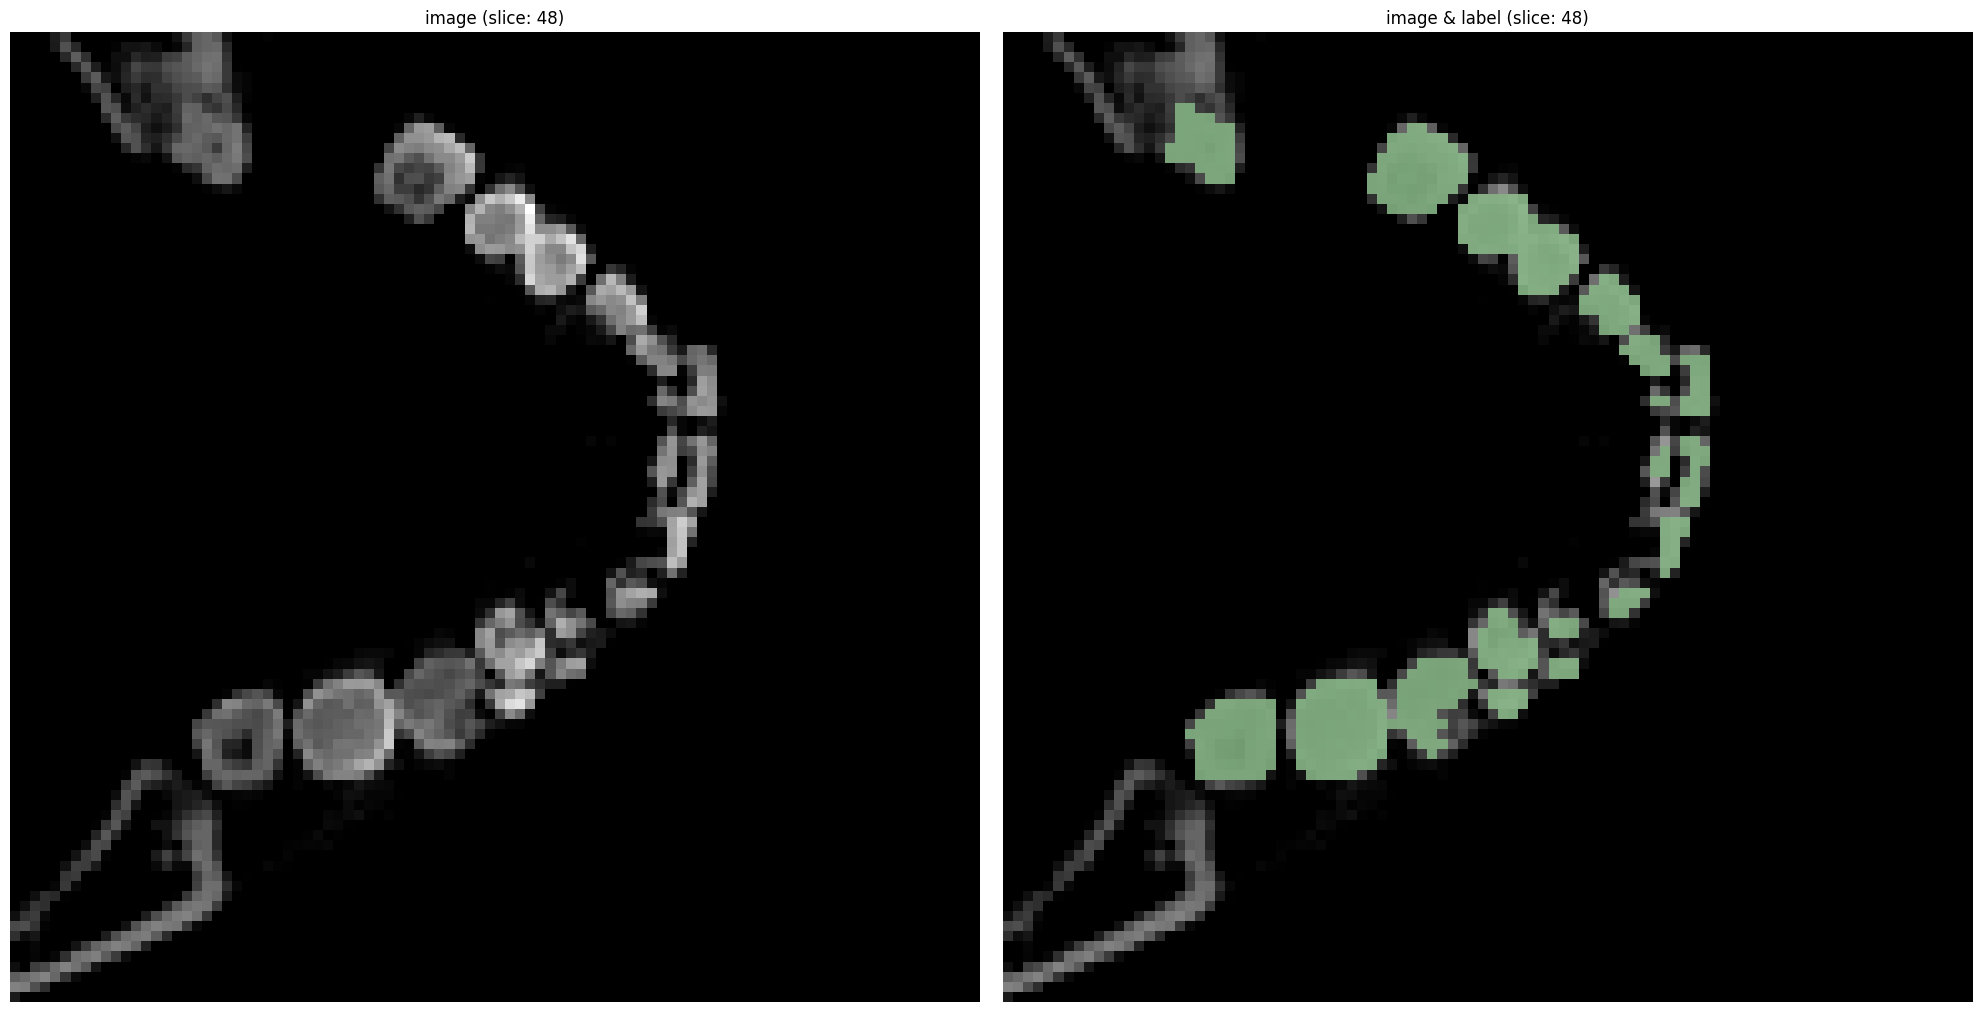

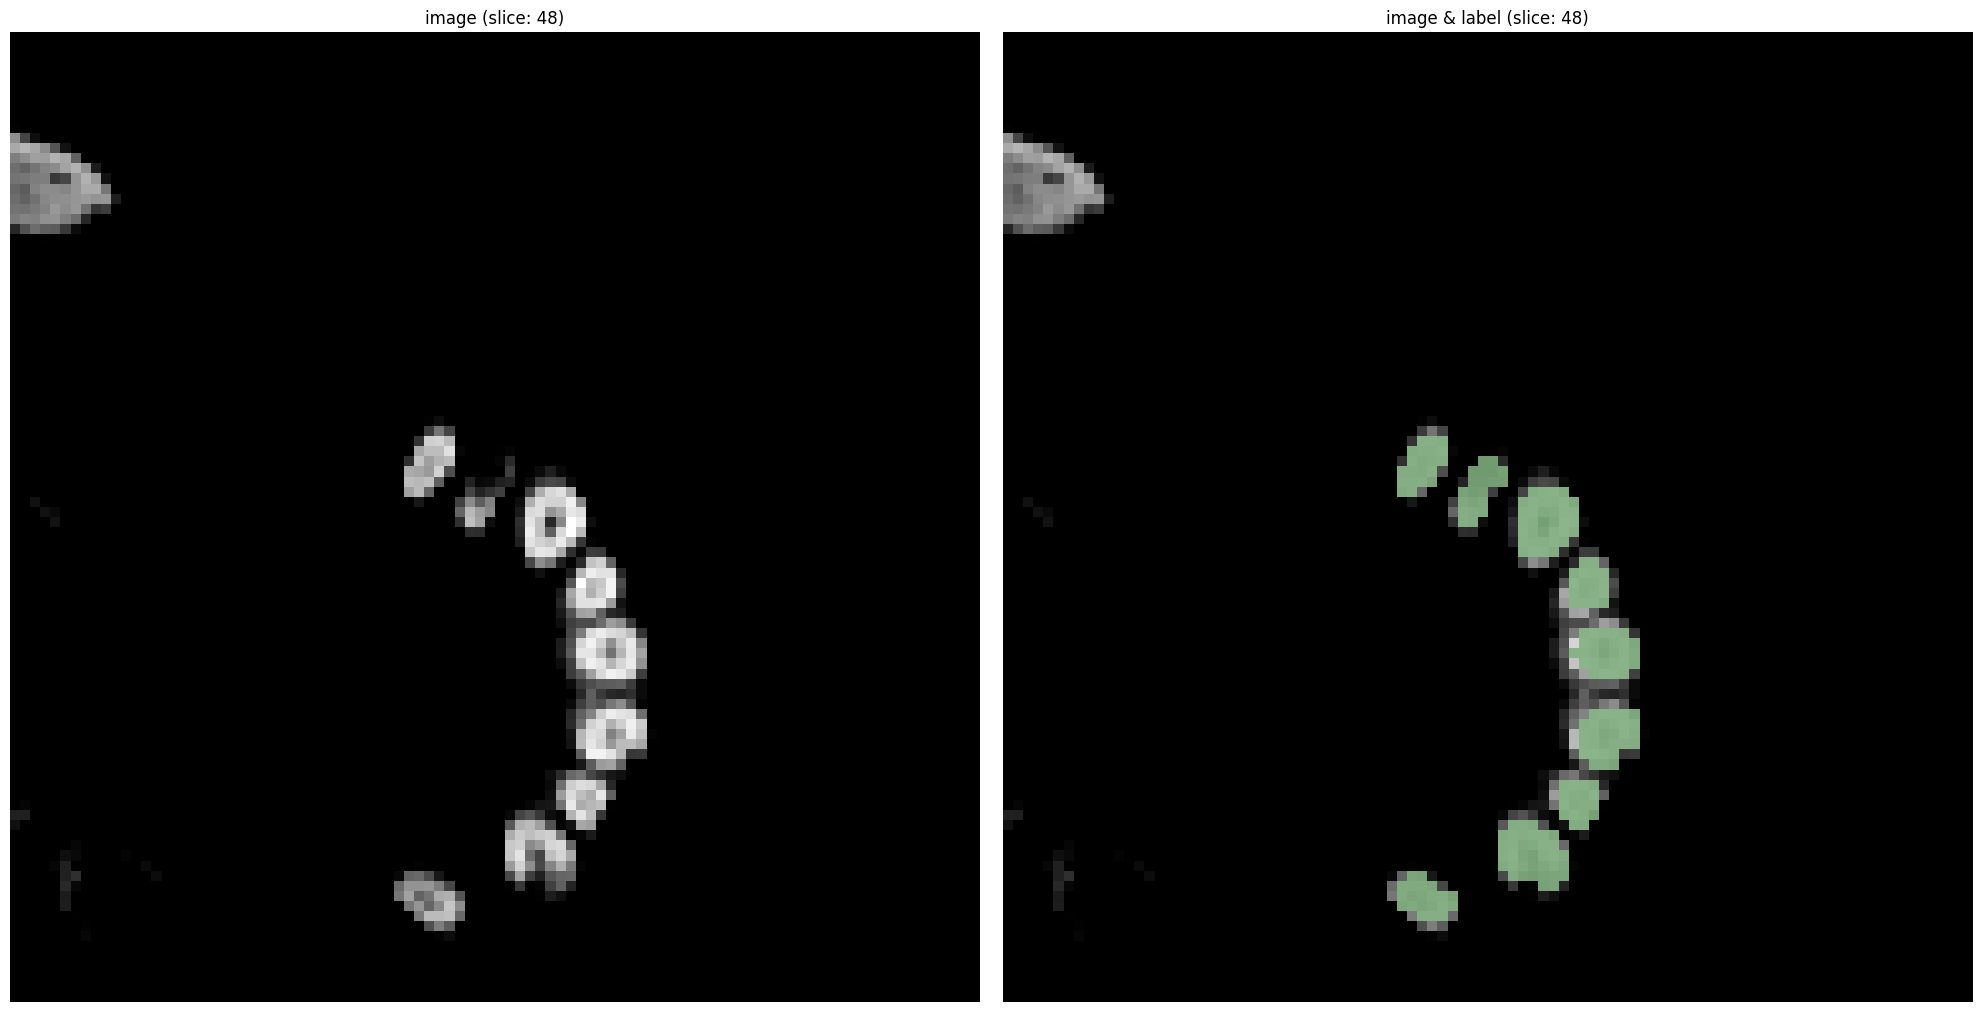

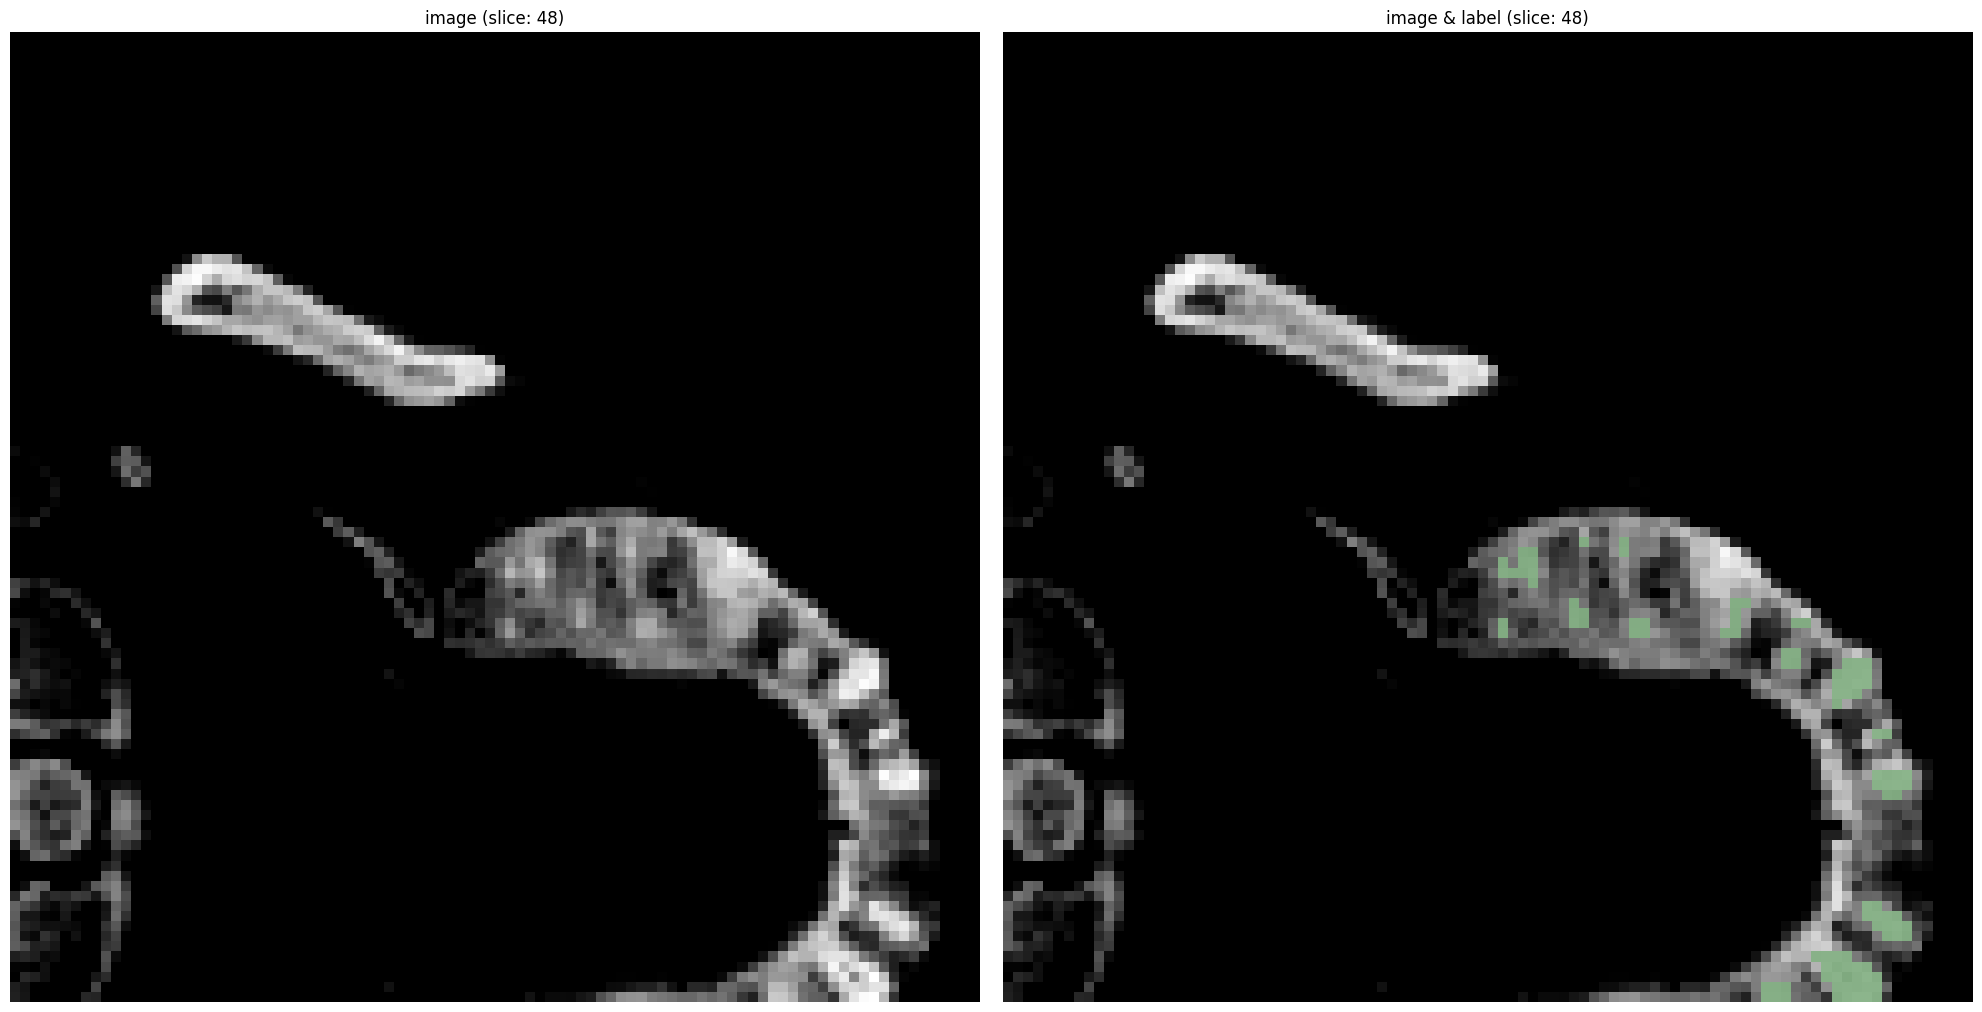

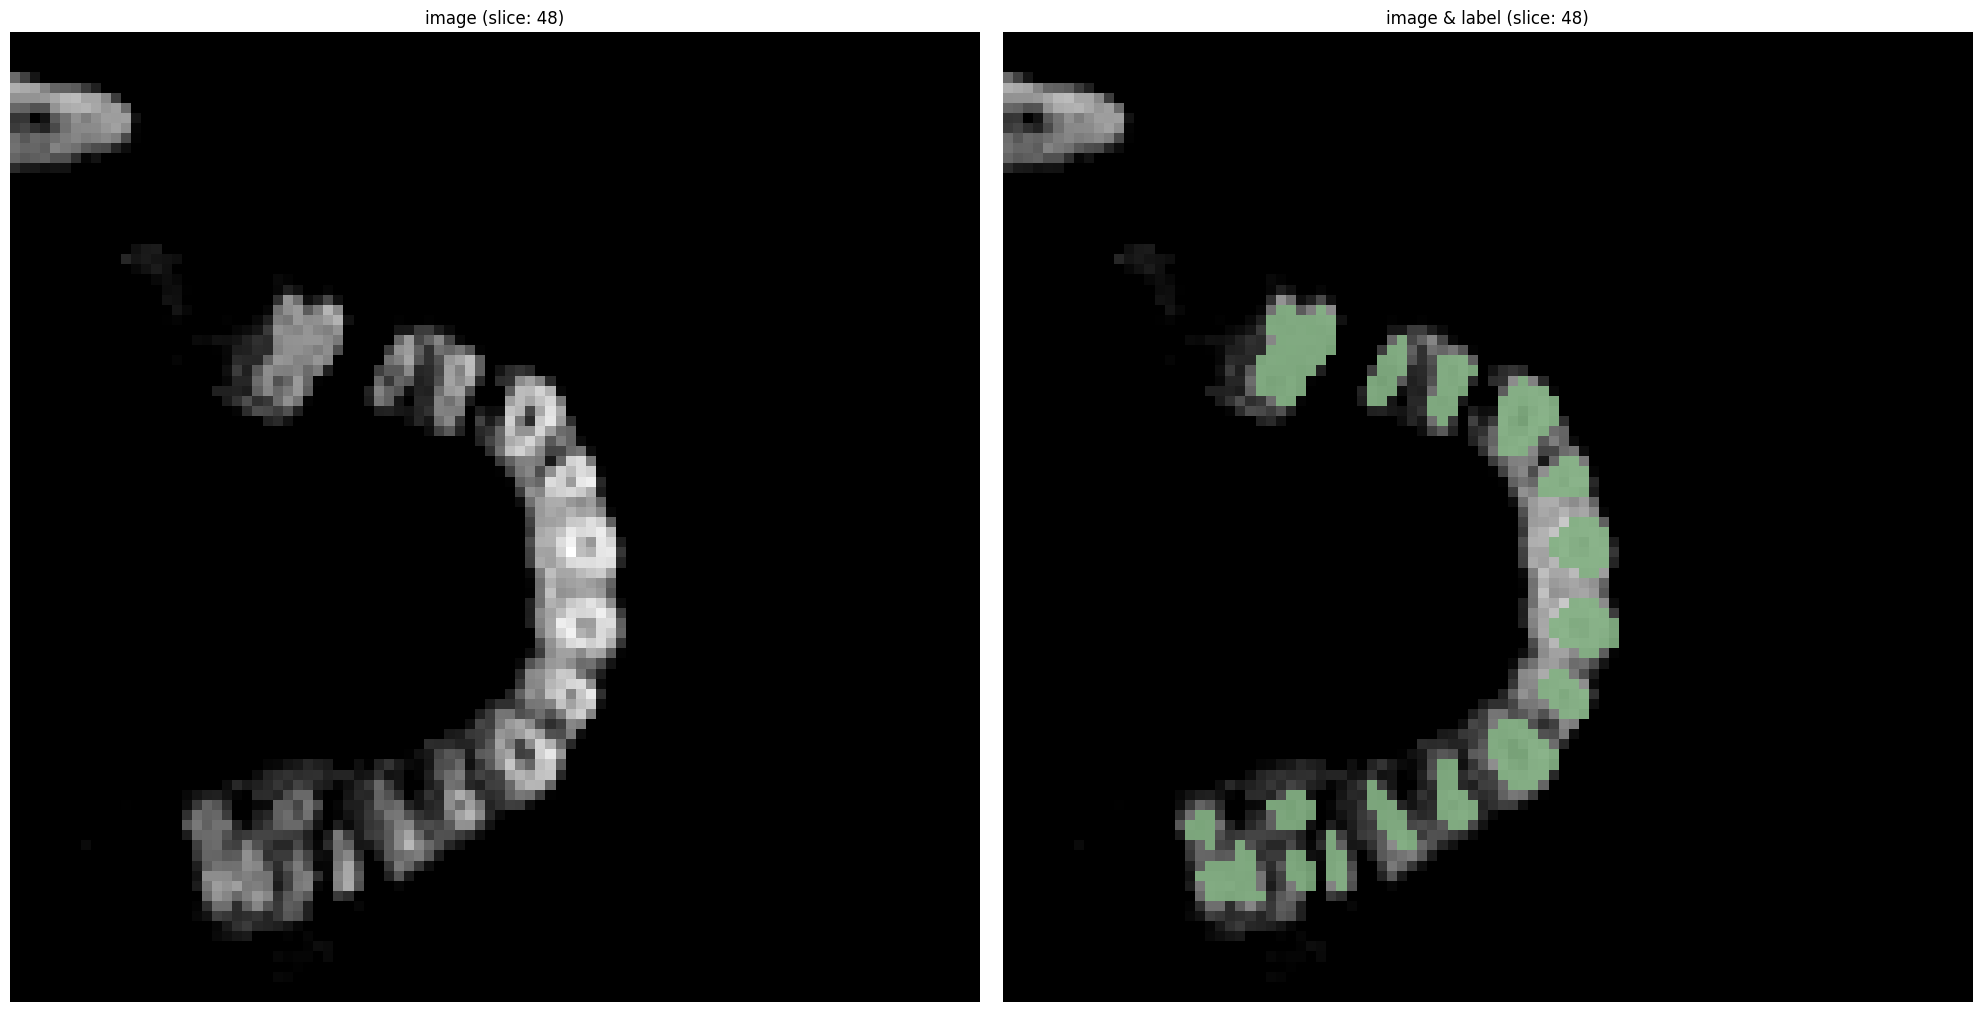

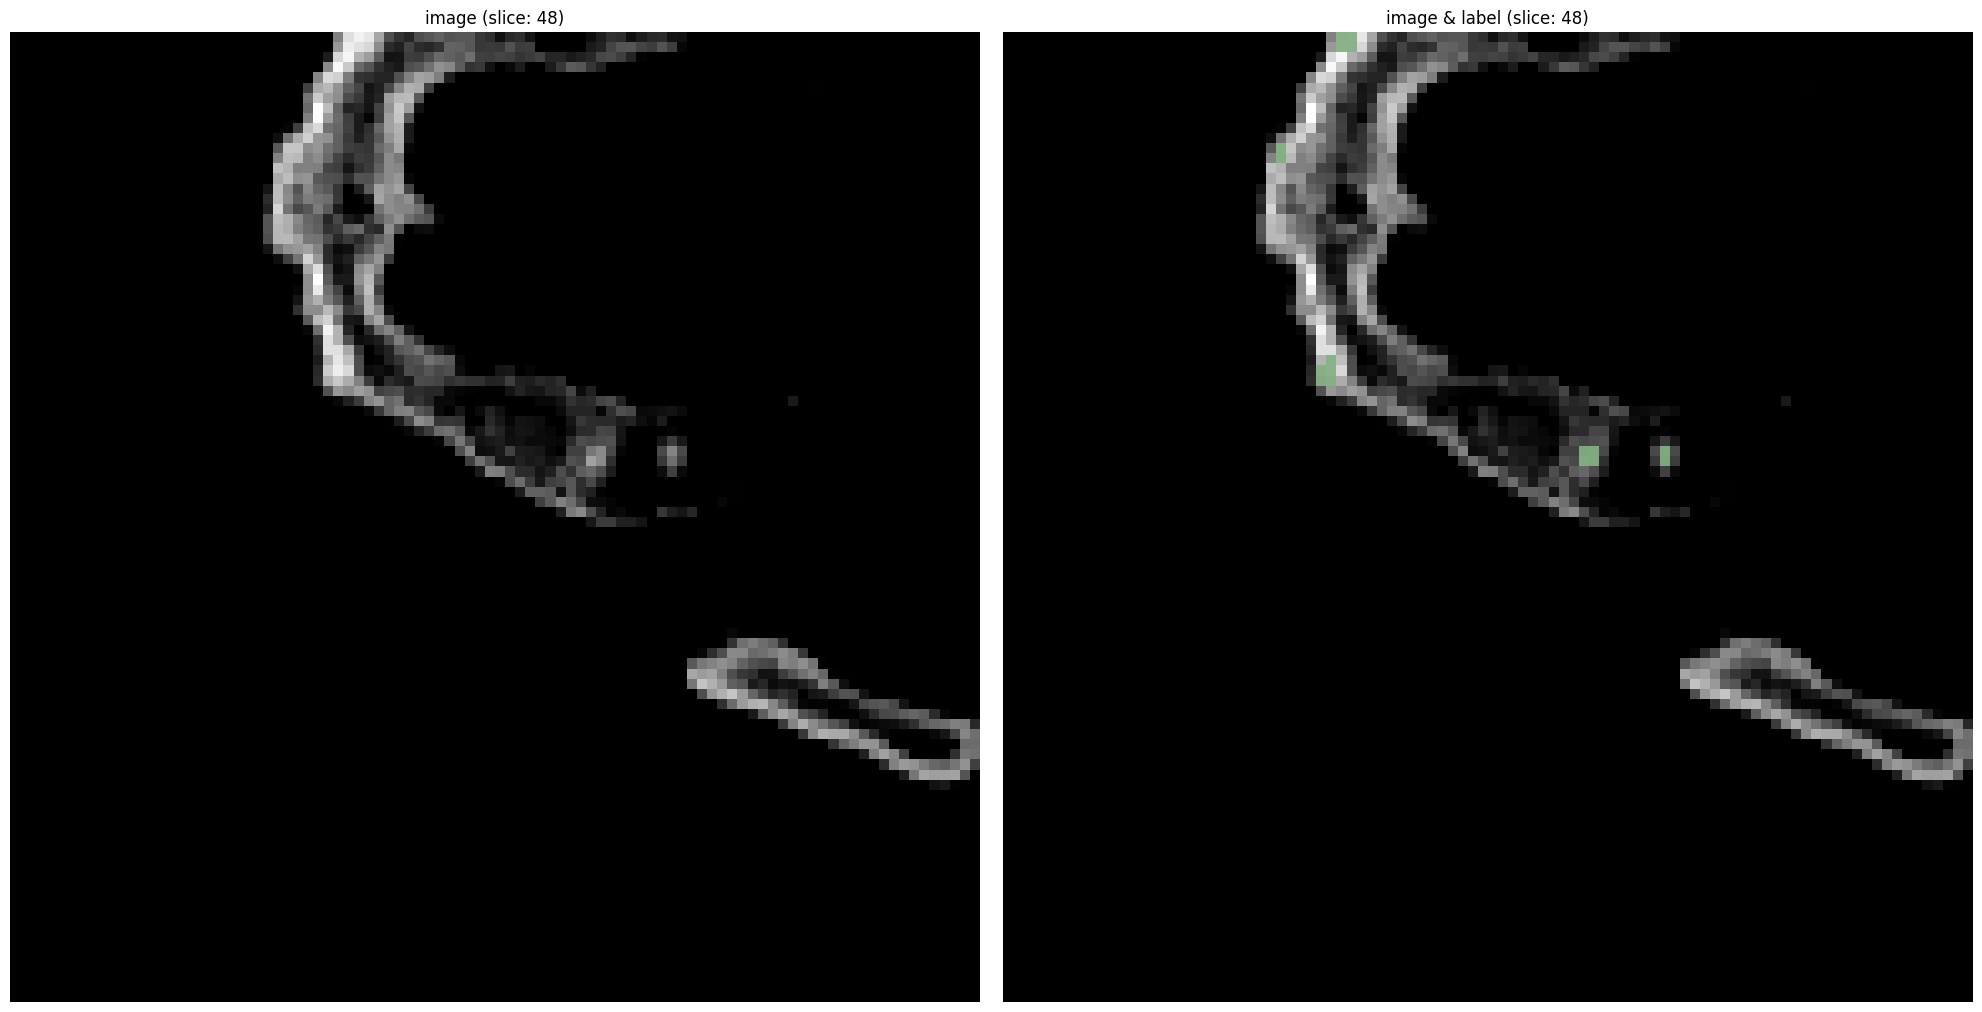

In [9]:
args = get_parser([])
args.data_name = 'tooth'
args.data_dir = data_dir
args.data_dicts_json = data_json
args.scale_intensity_type='range'
args.select_label_num=29
args.a_min=218
args.a_max=3187
args.roi_x=96
args.roi_y=96
args.roi_z=96
args.space_x=1.0
args.space_y=1.0
args.space_z=1.0

tr_ld, val_dl = DataLoader(args.data_name, args)

slice_idx = 48
num_classes = 2
for d in tr_ld:
    show_img_lbl(
        d['image'][0,0,:,:,slice_idx], 
        d['label'][0,0,:,:,slice_idx], 
        slice_idx=slice_idx,
        num_classes=num_classes
    )